In [41]:
import os
import pandas as pd
import numpy as np
import sys
import openpyxl

from datetime import datetime
import datetime
from datetime import timedelta

from tqdm import tqdm

import matplotlib

#시각화
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

from matplotlib import font_manager, rc
rc('font',family="AppleGothic")
plt.rcParams["font.family"]="AppleGothic" #plt 한글꺠짐
plt.rcParams["font.family"]="Arial" #외국어꺠짐
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 출력 설정
plt.rc('figure', figsize=(15,8))

sns.set(font="AppleGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid') #sns 한글깨짐
#그래프 세팅
font = {'family': 'serif',
        'color':  'white',
        'weight': 'normal',
        'size': 16,
        }

#마이너스 폰트
plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정
#판다스 컬럼 다보기
pd.set_option('display.max_columns', 100)

#시각화?
import platform
platform.system()

# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
#elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    #plt.rc('font', family='Malgun Gothic')



# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

In [42]:
# 낙상 환자 데이터 로드
fall_df = pd.read_csv('/Users/yena/Library/Mobile Documents/com~apple~CloudDocs/척척석사/코드/[1109]FINAL_FALL_PATIENT_298.csv')
fall = fall_df.copy()
print(fall.shape)
fall.head()

(2858, 23)


,Unnamed: 0,등록번호,MFS,total_cci,키,몸무게,성별,나이,평가일자,"ADL_배뇨, 배변",ADL_체위변경,ADL_침상 밖으로 이동,ADL_식사섭취,호흡 간호_비침습적 산소 투여,낙상발생일시,유무,Cluster,Cluster_c,통증강도,욕창_행동,욕창_영양,병원,낙상유무
0,505,1218594,0.0,2.5,166.3,0.0,M,70.0,2018-08-01,2,1,1,1,0,2018-08-02,1 days,B,2,0.6,1,0,부천,낙상환자
1,506,1218594,0.0,2.5,166.3,0.0,M,70.0,2018-08-01,2,1,1,1,0,2018-08-02,1 days,D,1,0.6,1,0,부천,낙상환자
2,507,1218594,0.0,2.5,166.3,0.0,M,70.0,2018-08-01,2,1,1,1,0,2018-08-02,1 days,E,1,0.6,1,0,부천,낙상환자
3,508,1218594,0.0,2.5,166.3,0.0,M,70.0,2018-08-01,2,1,1,1,0,2018-08-02,1 days,I,1,0.6,1,0,부천,낙상환자
4,509,1218594,0.0,2.5,166.3,0.0,M,70.0,2018-08-01,2,1,1,1,0,2018-08-02,1 days,S,1,0.6,1,0,부천,낙상환자


In [43]:
len(fall['등록번호'].unique())

298

In [44]:
# cluster, cluster_c랑 분리 
# fall_cluster = fall[['등록번호', 'Cluster', 'Cluster_c']]
fall = fall.drop(columns=['Cluster', 'Cluster_c'])
fall

,Unnamed: 0,등록번호,MFS,total_cci,키,몸무게,성별,나이,평가일자,"ADL_배뇨, 배변",ADL_체위변경,ADL_침상 밖으로 이동,ADL_식사섭취,호흡 간호_비침습적 산소 투여,낙상발생일시,유무,통증강도,욕창_행동,욕창_영양,병원,낙상유무
0,505,1218594,0.0,2.5,166.3,0.0,M,70.0,2018-08-01,2,1,1,1,0,2018-08-02,1 days,0.6,1,0,부천,낙상환자
1,506,1218594,0.0,2.5,166.3,0.0,M,70.0,2018-08-01,2,1,1,1,0,2018-08-02,1 days,0.6,1,0,부천,낙상환자
2,507,1218594,0.0,2.5,166.3,0.0,M,70.0,2018-08-01,2,1,1,1,0,2018-08-02,1 days,0.6,1,0,부천,낙상환자
3,508,1218594,0.0,2.5,166.3,0.0,M,70.0,2018-08-01,2,1,1,1,0,2018-08-02,1 days,0.6,1,0,부천,낙상환자
4,509,1218594,0.0,2.5,166.3,0.0,M,70.0,2018-08-01,2,1,1,1,0,2018-08-02,1 days,0.6,1,0,부천,낙상환자
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2853,330,1200546,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-06,0,0,0,0,0,2019-08-09,3 days,3.0,0,0,천안,낙상환자
2854,331,860045,NaN,NaN,NaN,NaN,NaN,NaN,2021-07-25,1,0,1,0,0,2021-07-25,0 days,3.5,1,0,천안,낙상환자
2855,332,860045,NaN,NaN,NaN,NaN,NaN,NaN,2021-07-25,1,0,1,0,0,2021-07-25,0 days,3.5,1,0,천안,낙상환자
2856,333,860045,NaN,NaN,NaN,NaN,NaN,NaN,2021-07-25,1,0,1,0,0,2021-07-25,0 days,3.5,1,0,천안,낙상환자


In [45]:
fall = fall.drop(columns='낙상유무')

In [46]:
fall.columns

Index(['Unnamed: 0', '등록번호', 'MFS', 'total_cci', '키', '몸무게', '성별', '나이',
       '평가일자', 'ADL_배뇨, 배변', 'ADL_체위변경', 'ADL_침상 밖으로 이동', 'ADL_식사섭취',
       '호흡 간호_비침습적 산소 투여', '낙상발생일시', '유무', '통증강도', '욕창_행동', '욕창_영양', '병원'],
      dtype='object')

In [47]:
fall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2858 entries, 0 to 2857
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2858 non-null   int64  
 1   등록번호              2858 non-null   int64  
 2   MFS               2844 non-null   float64
 3   total_cci         2844 non-null   float64
 4   키                 2844 non-null   float64
 5   몸무게               2844 non-null   float64
 6   성별                2844 non-null   object 
 7   나이                2844 non-null   float64
 8   평가일자              2858 non-null   object 
 9   ADL_배뇨, 배변        2858 non-null   int64  
 10  ADL_체위변경          2858 non-null   int64  
 11  ADL_침상 밖으로 이동     2858 non-null   int64  
 12  ADL_식사섭취          2858 non-null   int64  
 13  호흡 간호_비침습적 산소 투여  2858 non-null   int64  
 14  낙상발생일시            2858 non-null   object 
 15  유무                2858 non-null   object 
 16  통증강도              2858 non-null   float64


In [48]:
def str_to_dt(x):
    x = str(x)
    y = x[0:4]
    m = x[4:6]
    d = x[6:8]
    format_ = '%Y-%m-%d'
    date = y+'-'+m+'-'+d
    dates = datetime.datetime.strptime(date, format_)
    return dates

In [49]:
fall = fall.drop(columns=['낙상발생일시', '평가일자'])
fall.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2858 entries, 0 to 2857
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2858 non-null   int64  
 1   등록번호              2858 non-null   int64  
 2   MFS               2844 non-null   float64
 3   total_cci         2844 non-null   float64
 4   키                 2844 non-null   float64
 5   몸무게               2844 non-null   float64
 6   성별                2844 non-null   object 
 7   나이                2844 non-null   float64
 8   ADL_배뇨, 배변        2858 non-null   int64  
 9   ADL_체위변경          2858 non-null   int64  
 10  ADL_침상 밖으로 이동     2858 non-null   int64  
 11  ADL_식사섭취          2858 non-null   int64  
 12  호흡 간호_비침습적 산소 투여  2858 non-null   int64  
 13  유무                2858 non-null   object 
 14  통증강도              2858 non-null   float64
 15  욕창_행동             2858 non-null   int64  
 16  욕창_영양             2858 non-null   int64  


## **MFS**

In [50]:
fall['MFS'].dropna()

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
2839    50.0
2840    50.0
2841    50.0
2842    50.0
2843    50.0
Name: MFS, Length: 2844, dtype: float64

<AxesSubplot:xlabel='MFS'>

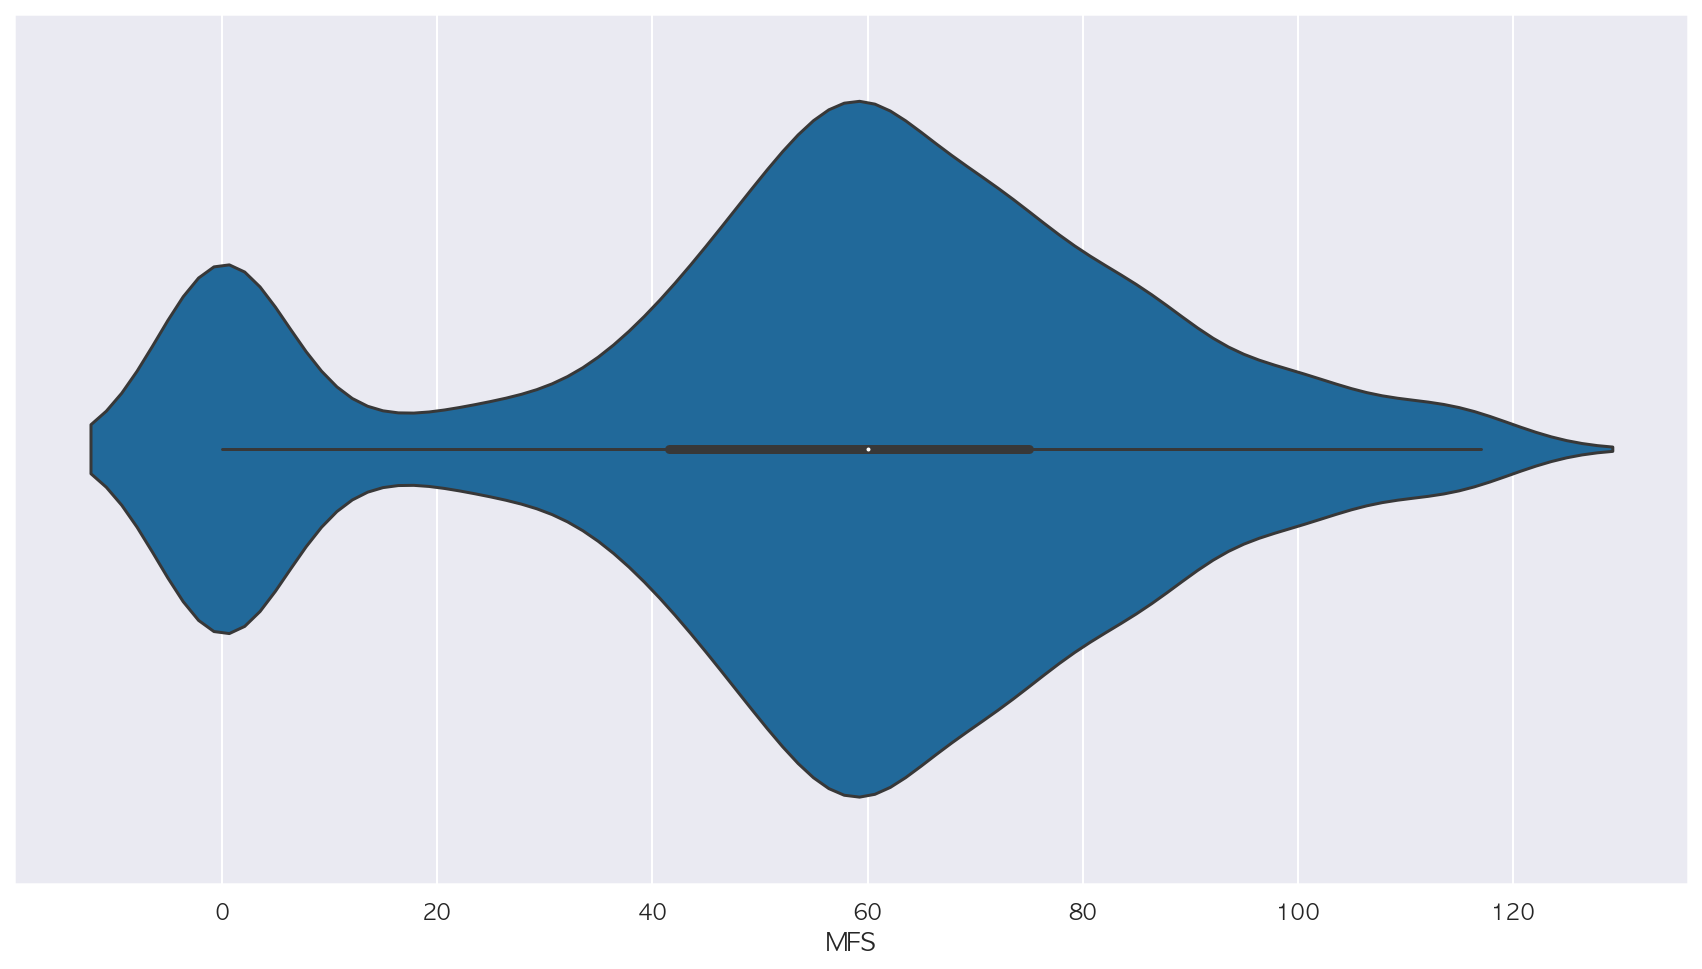

In [51]:
sns.set_palette('GnBu_r')
sns.violinplot(x=fall['MFS'])

In [52]:
fall['MFS'].describe()

count    2844.000000
mean       55.202532
std        30.010277
min         0.000000
25%        41.500000
50%        60.000000
75%        75.000000
max       117.000000
Name: MFS, dtype: float64

In [53]:
def high(x):
    if x >= 51 :
        high = 'high'
    else:
        high = 'not high'
    
    return high

In [54]:
fall['high'] = fall['MFS'].apply(lambda x:high(x))
fall.head()

,Unnamed: 0,등록번호,MFS,total_cci,키,몸무게,성별,나이,"ADL_배뇨, 배변",ADL_체위변경,ADL_침상 밖으로 이동,ADL_식사섭취,호흡 간호_비침습적 산소 투여,유무,통증강도,욕창_행동,욕창_영양,병원,high
0,505,1218594,0.0,2.5,166.3,0.0,M,70.0,2,1,1,1,0,1 days,0.6,1,0,부천,not high
1,506,1218594,0.0,2.5,166.3,0.0,M,70.0,2,1,1,1,0,1 days,0.6,1,0,부천,not high
2,507,1218594,0.0,2.5,166.3,0.0,M,70.0,2,1,1,1,0,1 days,0.6,1,0,부천,not high
3,508,1218594,0.0,2.5,166.3,0.0,M,70.0,2,1,1,1,0,1 days,0.6,1,0,부천,not high
4,509,1218594,0.0,2.5,166.3,0.0,M,70.0,2,1,1,1,0,1 days,0.6,1,0,부천,not high


<AxesSubplot:xlabel='high', ylabel='Count'>

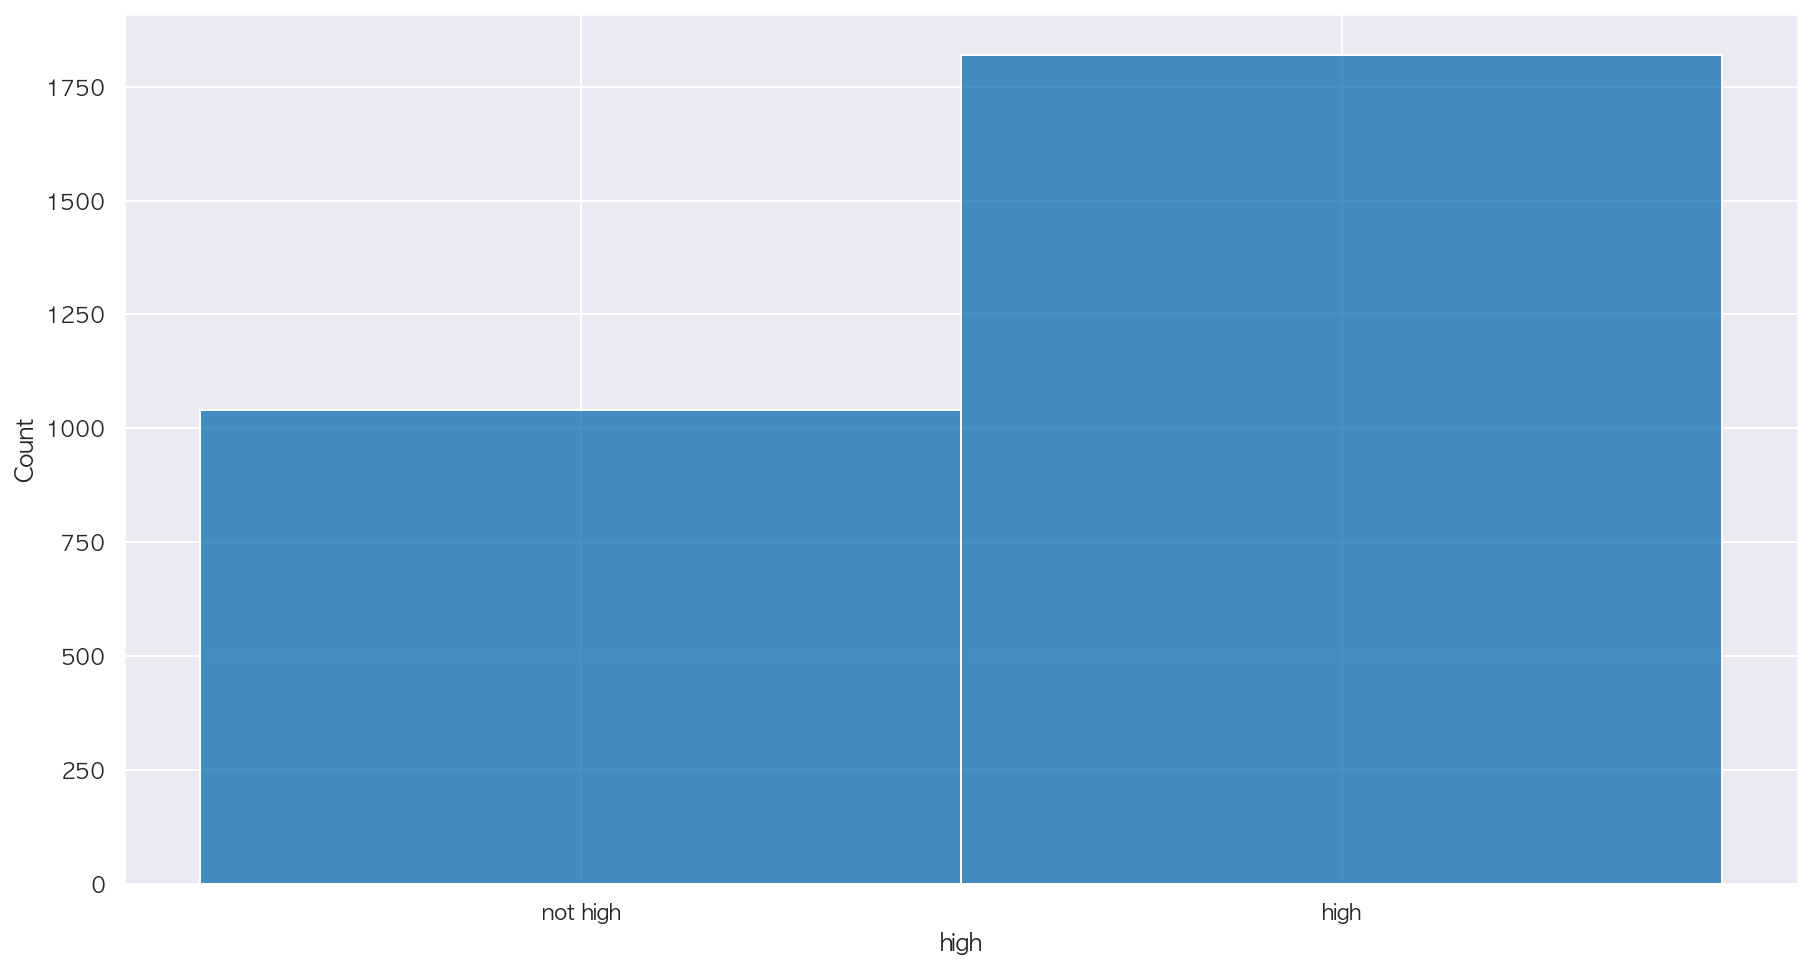

In [55]:

sns.histplot(fall['high'])

In [56]:
high_df = fall[['등록번호','high']]
high_df = high_df.drop_duplicates()


In [57]:

high_df['high'].value_counts()


high        163
not high    135
Name: high, dtype: int64

## **키, 몸무게, 성별, 나이**

In [58]:
basic = fall[['등록번호','키', '몸무게', '성별', '나이']]
basic = basic.drop_duplicates()
basic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298 entries, 0 to 2854
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   등록번호    298 non-null    int64  
 1   키       294 non-null    float64
 2   몸무게     294 non-null    float64
 3   성별      294 non-null    object 
 4   나이      294 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 14.0+ KB


<AxesSubplot:xlabel='키'>

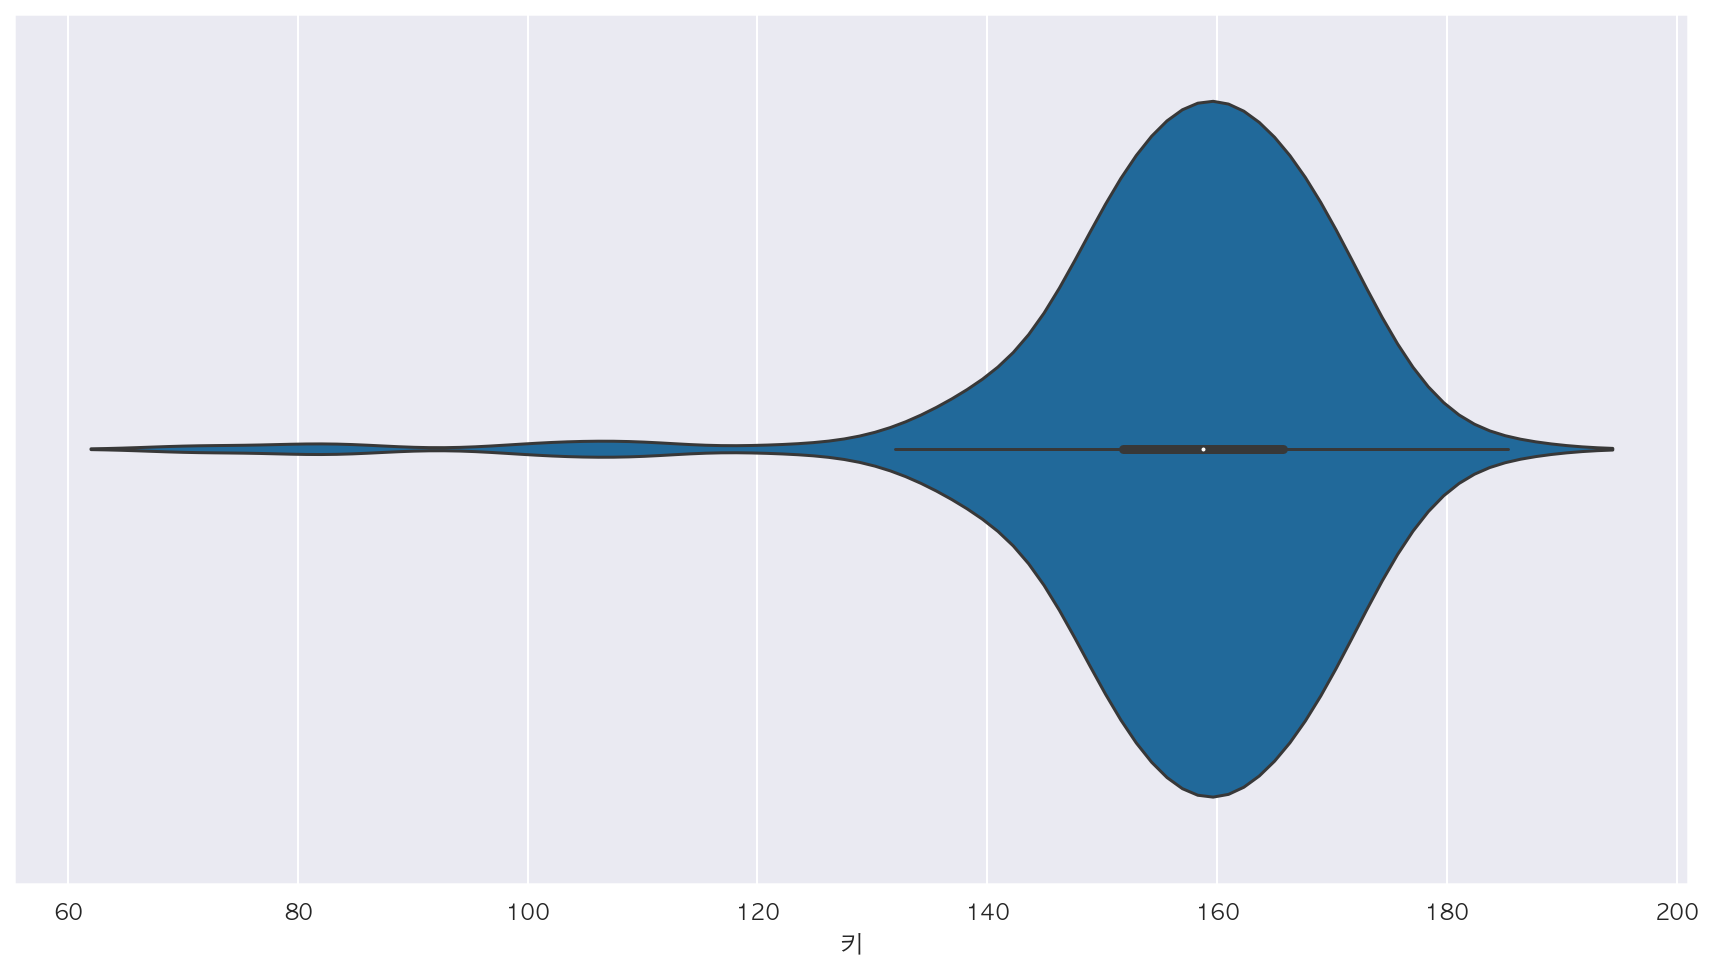

In [59]:
sns.violinplot(x=basic['키'])

In [60]:
basic['키'].describe()

count    294.000000
mean     157.154252
std       14.164932
min       71.050000
25%      151.825000
50%      158.750000
75%      165.725000
max      185.300000
Name: 키, dtype: float64

In [61]:
weight = basic.loc[basic['몸무게'] > 0]

In [62]:
weight

,등록번호,키,몸무게,성별,나이
44,65175,164.0,22.0,M,75.4
53,1503683,163.5,31.0,M,76.0
59,1207584,144.1,31.7,F,79.4
75,1304634,146.5,34.1,F,77.0
81,1887613,133.0,34.9,F,49.0
...,...,...,...,...,...
2796,2233037,169.1,97.0,M,44.9
2812,594511,179.0,98.4,M,44.0
2817,2058865,171.0,101.0,M,31.0
2821,2105479,185.3,101.8,M,35.9


<AxesSubplot:xlabel='몸무게'>

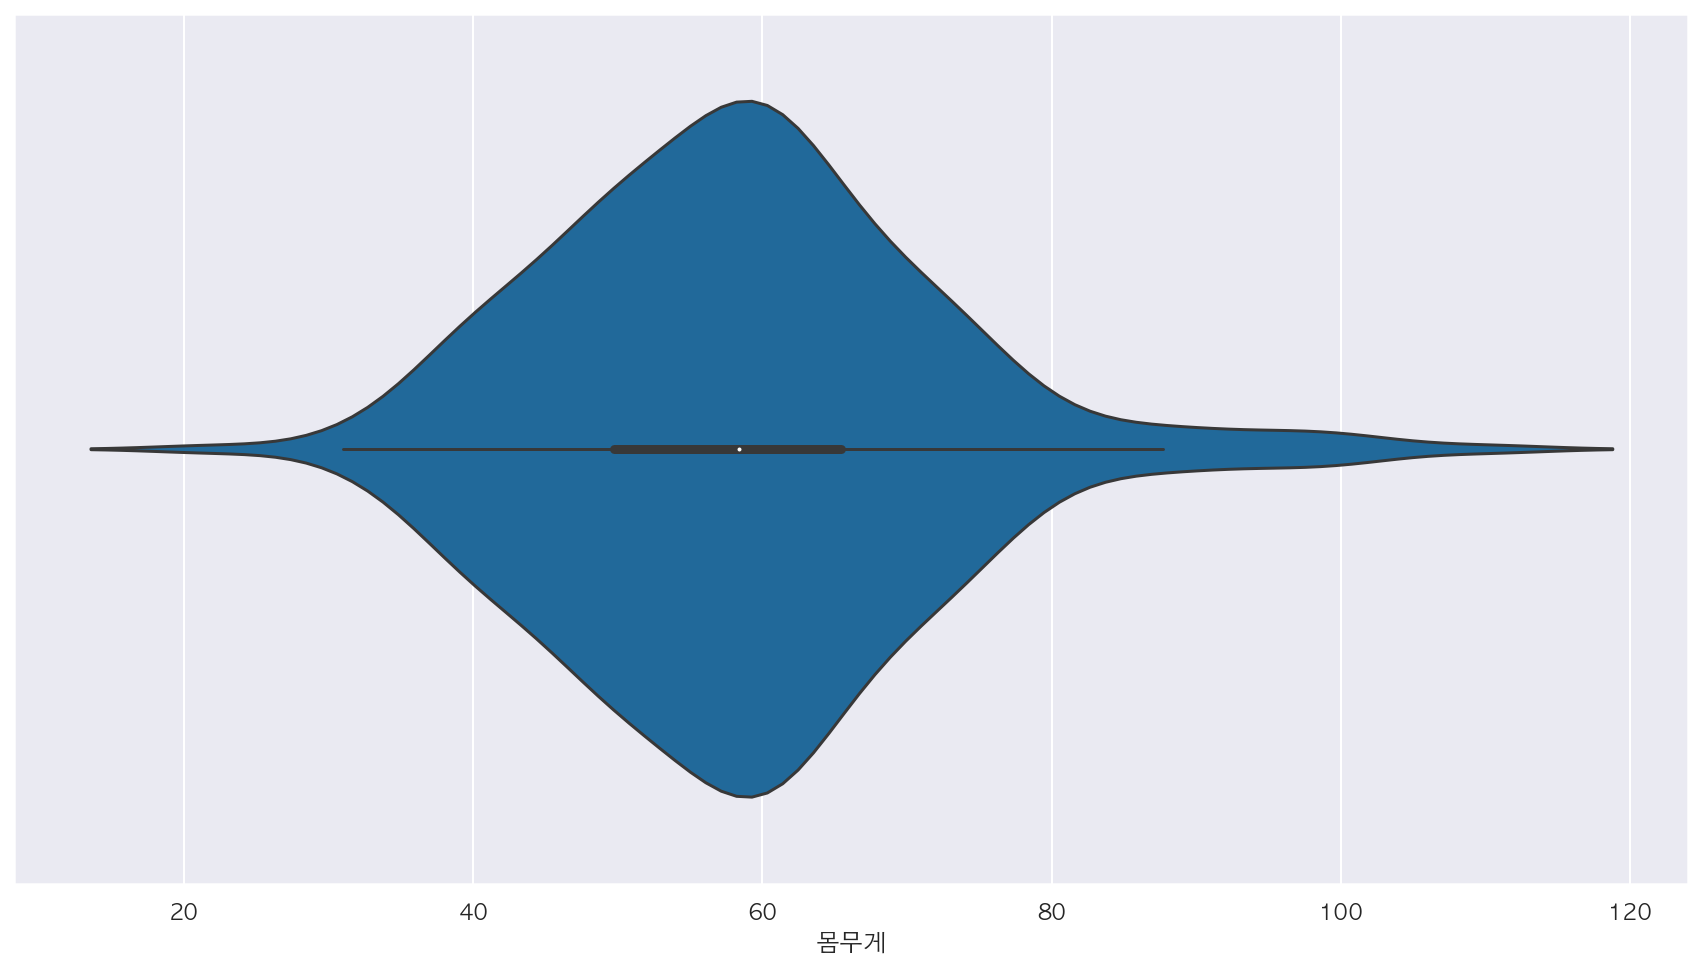

In [63]:
sns.violinplot(x=weight['몸무게'])

In [64]:
weight['몸무게'].describe()

count    289.000000
mean      58.556920
std       13.166951
min       22.000000
25%       49.700000
50%       58.400000
75%       65.400000
max      110.300000
Name: 몸무게, dtype: float64

In [65]:
sex = fall[['등록번호','성별']]
sex = sex.drop_duplicates()
sex.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298 entries, 0 to 2854
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   등록번호    298 non-null    int64 
 1   성별      294 non-null    object
dtypes: int64(1), object(1)
memory usage: 7.0+ KB


<AxesSubplot:xlabel='성별', ylabel='Count'>

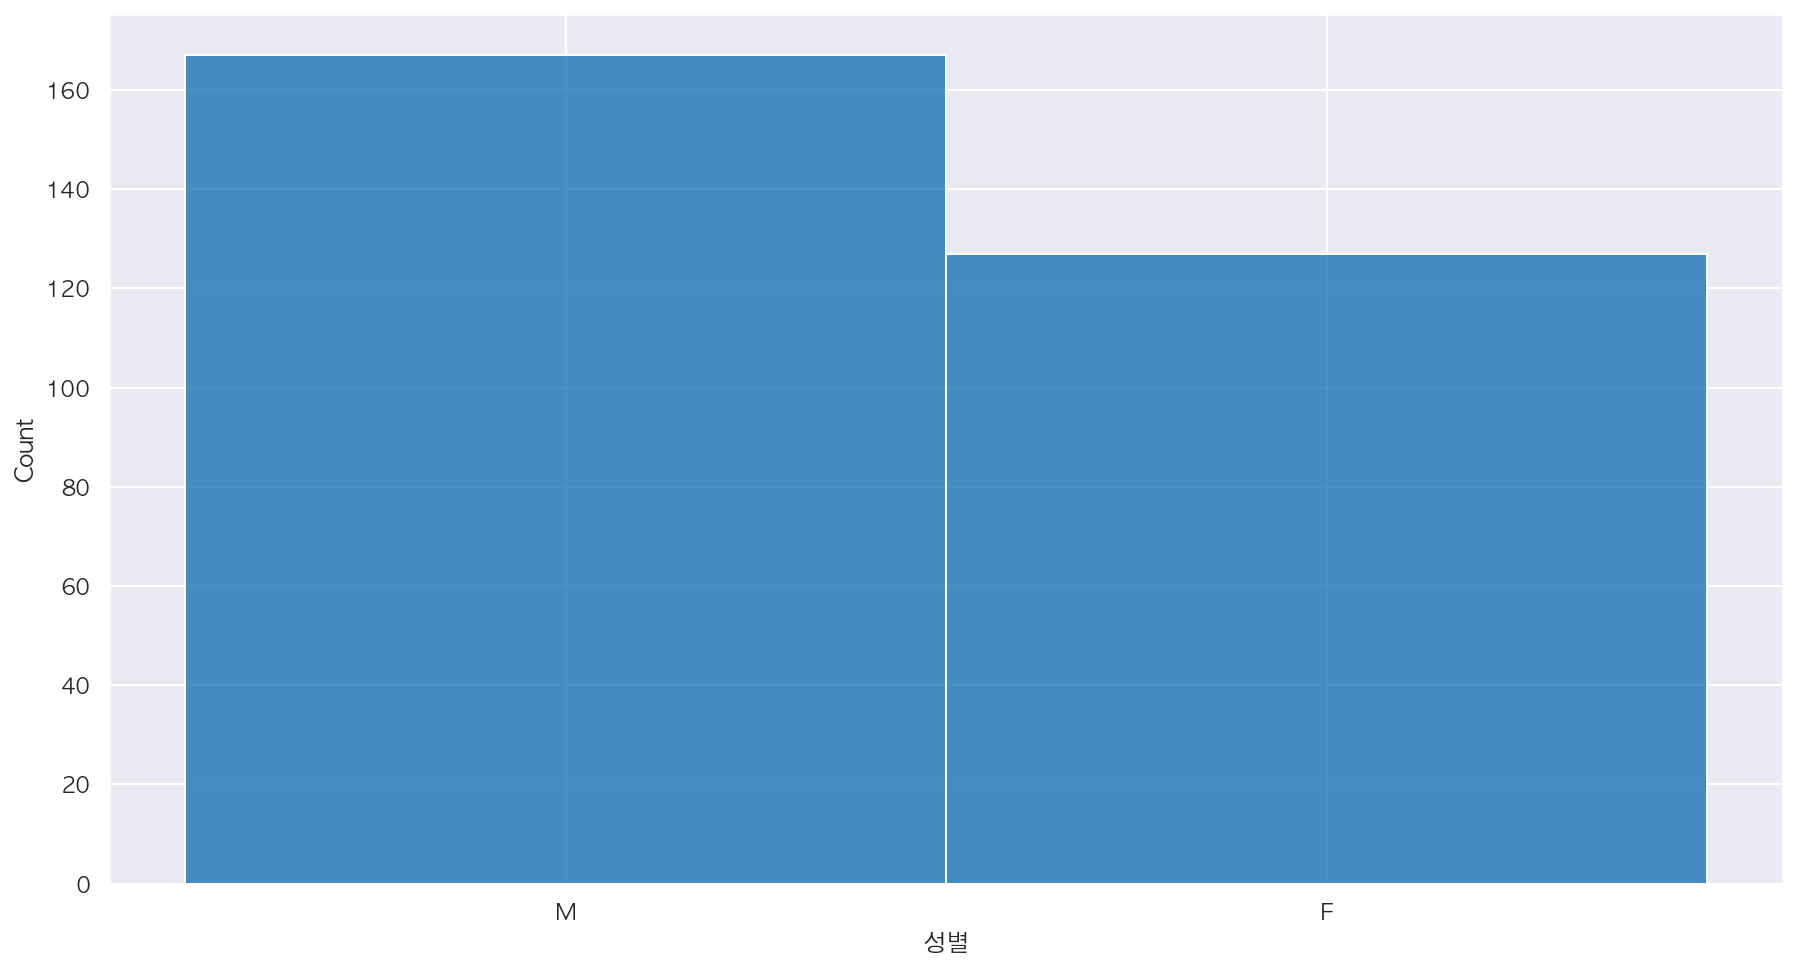

In [66]:
sns.histplot(basic['성별'])

In [67]:
basic['성별'].value_counts()

M    167
F    127
Name: 성별, dtype: int64

/Users/yena/miniforge3/envs/python_study_3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='나이'>

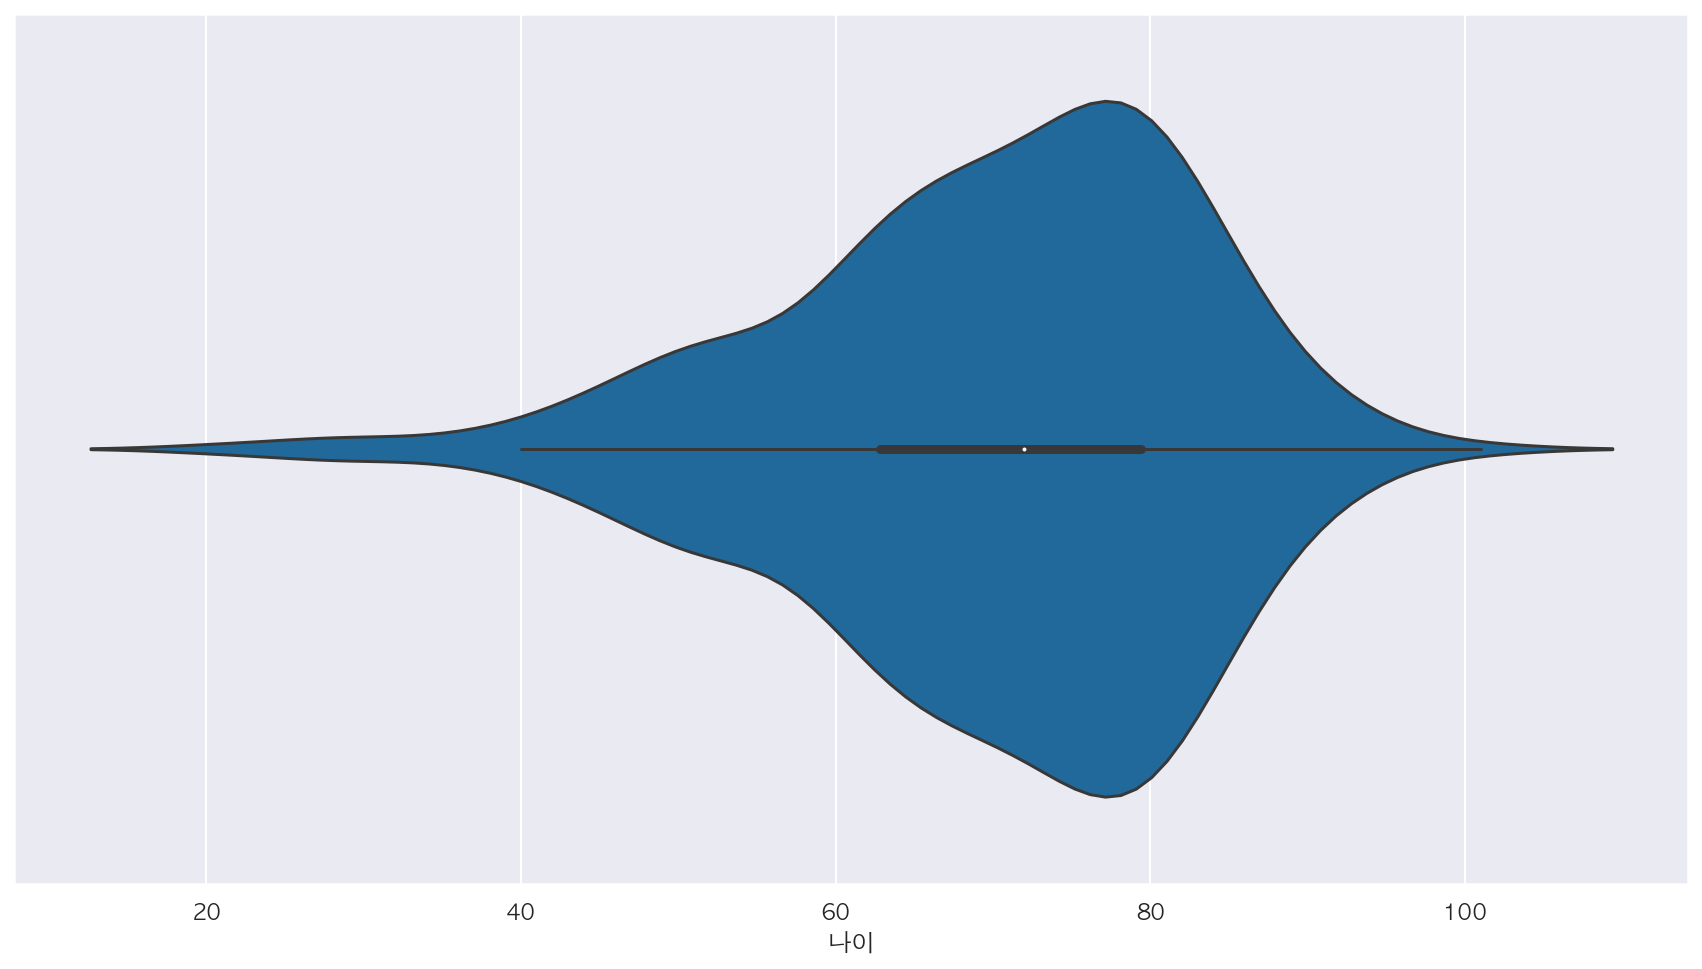

In [68]:
sns.violinplot(basic['나이'])

In [69]:
basic['나이'].describe()

count    294.000000
mean      70.024592
std       13.031750
min       21.000000
25%       62.800000
50%       72.000000
75%       79.400000
max      101.000000
Name: 나이, dtype: float64

In [70]:
def age(x):
    if x < 65 and x > 18:
        age = 'young'
    else:
        age = 'old'
        
    return age

In [71]:
basic['age'] = basic['나이'].apply(lambda x:age(x))
basic.head()

,등록번호,키,몸무게,성별,나이,age
0,1218594,166.30,0.0,M,70.00,old
6,1283615,165.00,0.0,F,60.00,young
25,1185694,162.10,0.0,M,64.00,young
29,1608859,155.70,0.0,F,80.00,old
36,1474897,111.33,0.0,M,74.33,old


<AxesSubplot:xlabel='age', ylabel='Count'>

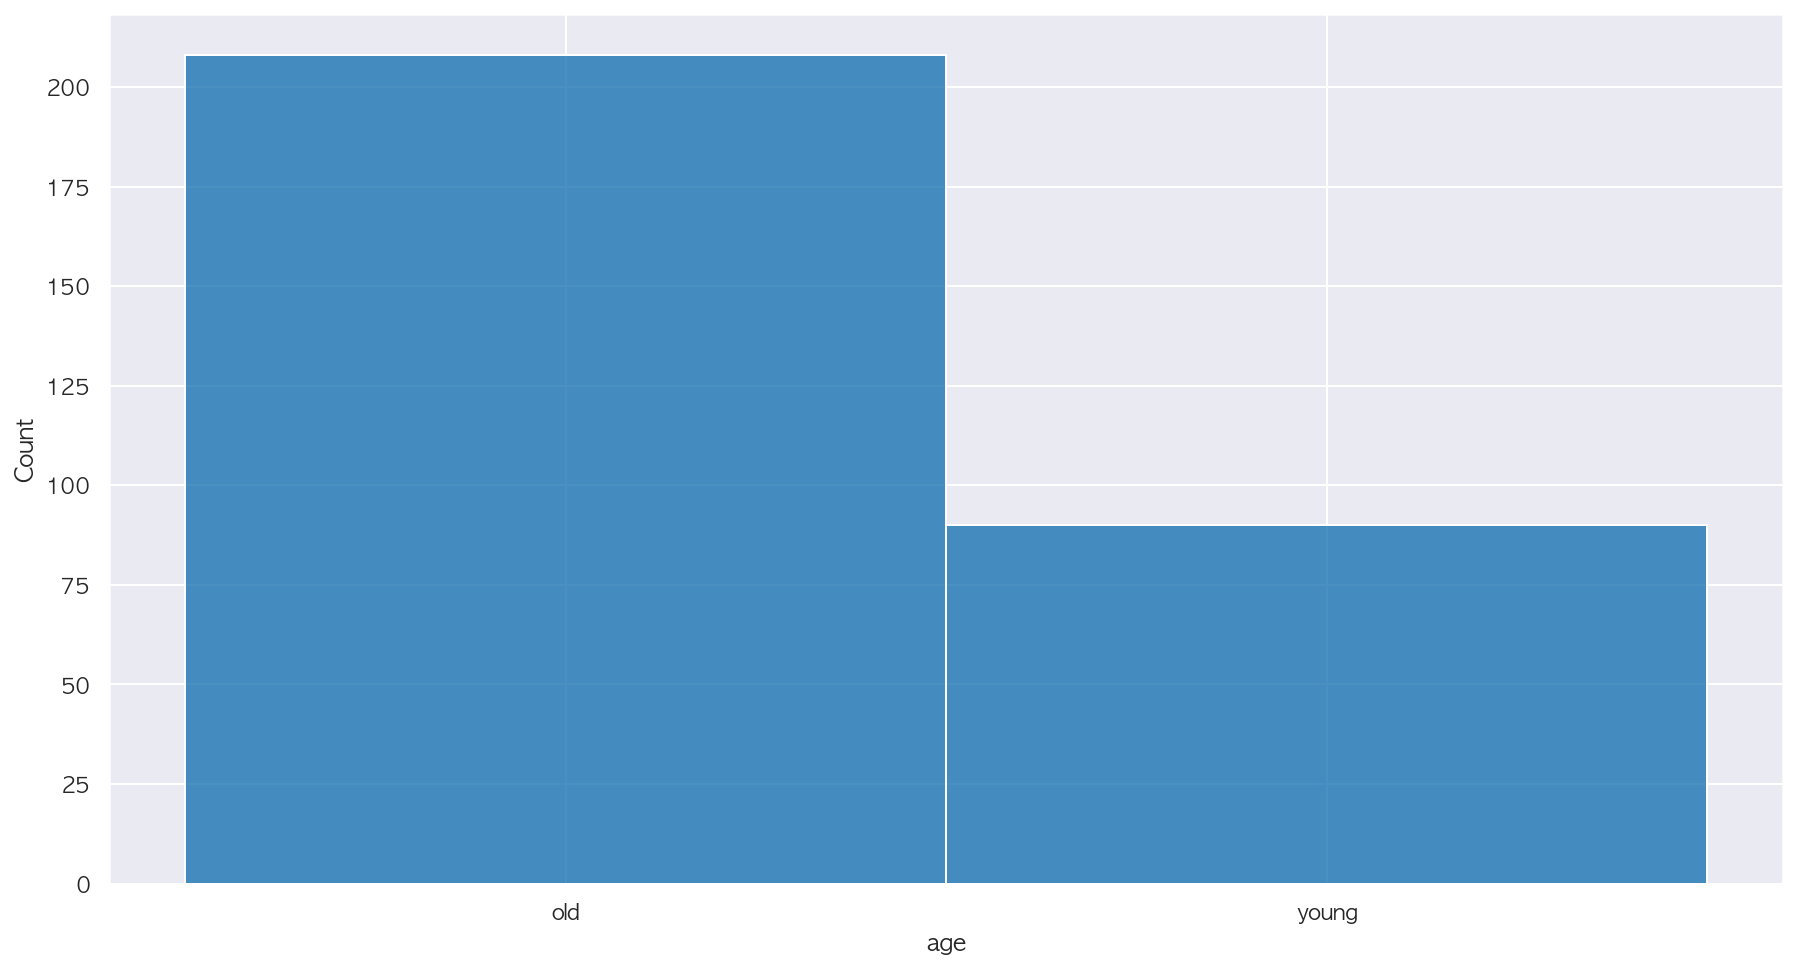

In [72]:
sns.histplot(basic['age'])

In [73]:
basic['age'].value_counts()

old      208
young     90
Name: age, dtype: int64

## **total_cci**

In [74]:
cci = fall[['등록번호', 'total_cci']]
cci = cci.drop_duplicates()
cci.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298 entries, 0 to 2854
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   등록번호       298 non-null    int64  
 1   total_cci  294 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 7.0 KB


<AxesSubplot:xlabel='total_cci', ylabel='Count'>

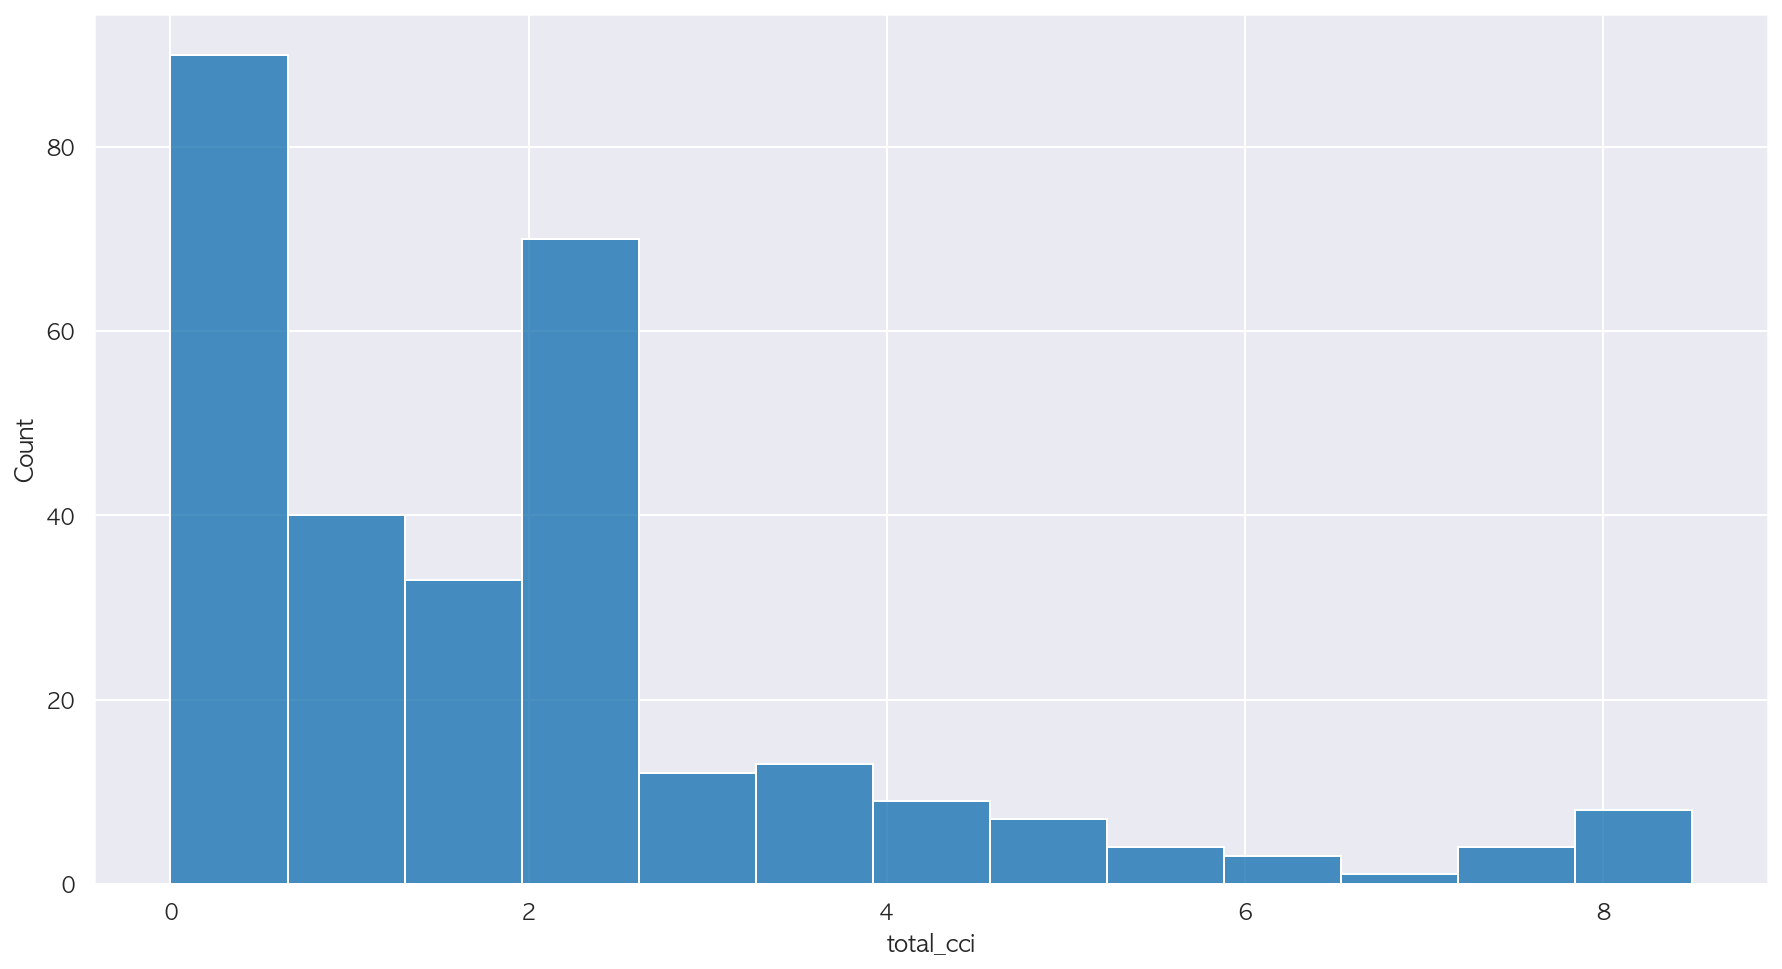

In [75]:
sns.histplot(x=cci['total_cci'])

In [76]:
cci['total_cci'].describe()

count    294.000000
mean       1.881973
std        1.900525
min        0.000000
25%        0.300000
50%        1.800000
75%        2.500000
max        8.500000
Name: total_cci, dtype: float64

## **ADL**

In [77]:
fall.columns

Index(['Unnamed: 0', '등록번호', 'MFS', 'total_cci', '키', '몸무게', '성별', '나이',
       'ADL_배뇨, 배변', 'ADL_체위변경', 'ADL_침상 밖으로 이동', 'ADL_식사섭취',
       '호흡 간호_비침습적 산소 투여', '유무', '통증강도', '욕창_행동', '욕창_영양', '병원', 'high'],
      dtype='object')

<AxesSubplot:xlabel='ADL_배뇨, 배변', ylabel='count'>

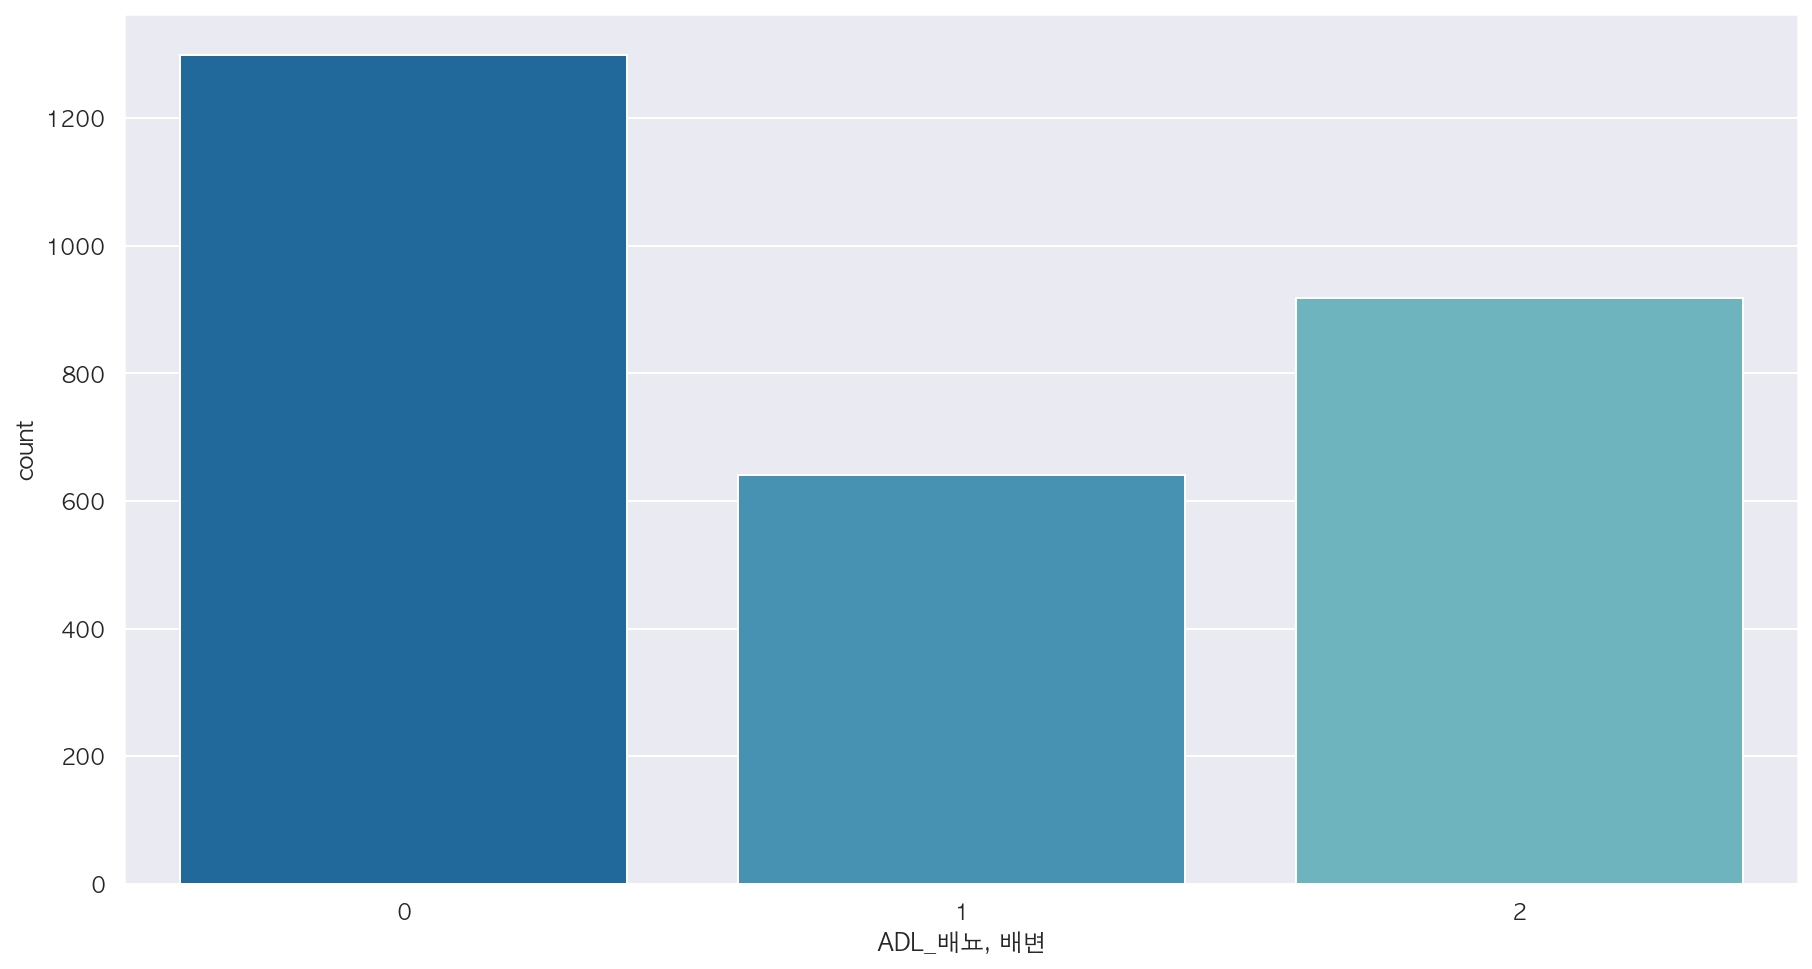

In [78]:
sns.countplot(x=fall['ADL_배뇨, 배변'])

In [103]:
fall['ADL_배뇨, 배변'].value_counts()

0    1299
2     918
1     641
Name: ADL_배뇨, 배변, dtype: int64

<AxesSubplot:xlabel='ADL_배뇨, 배변', ylabel='count'>

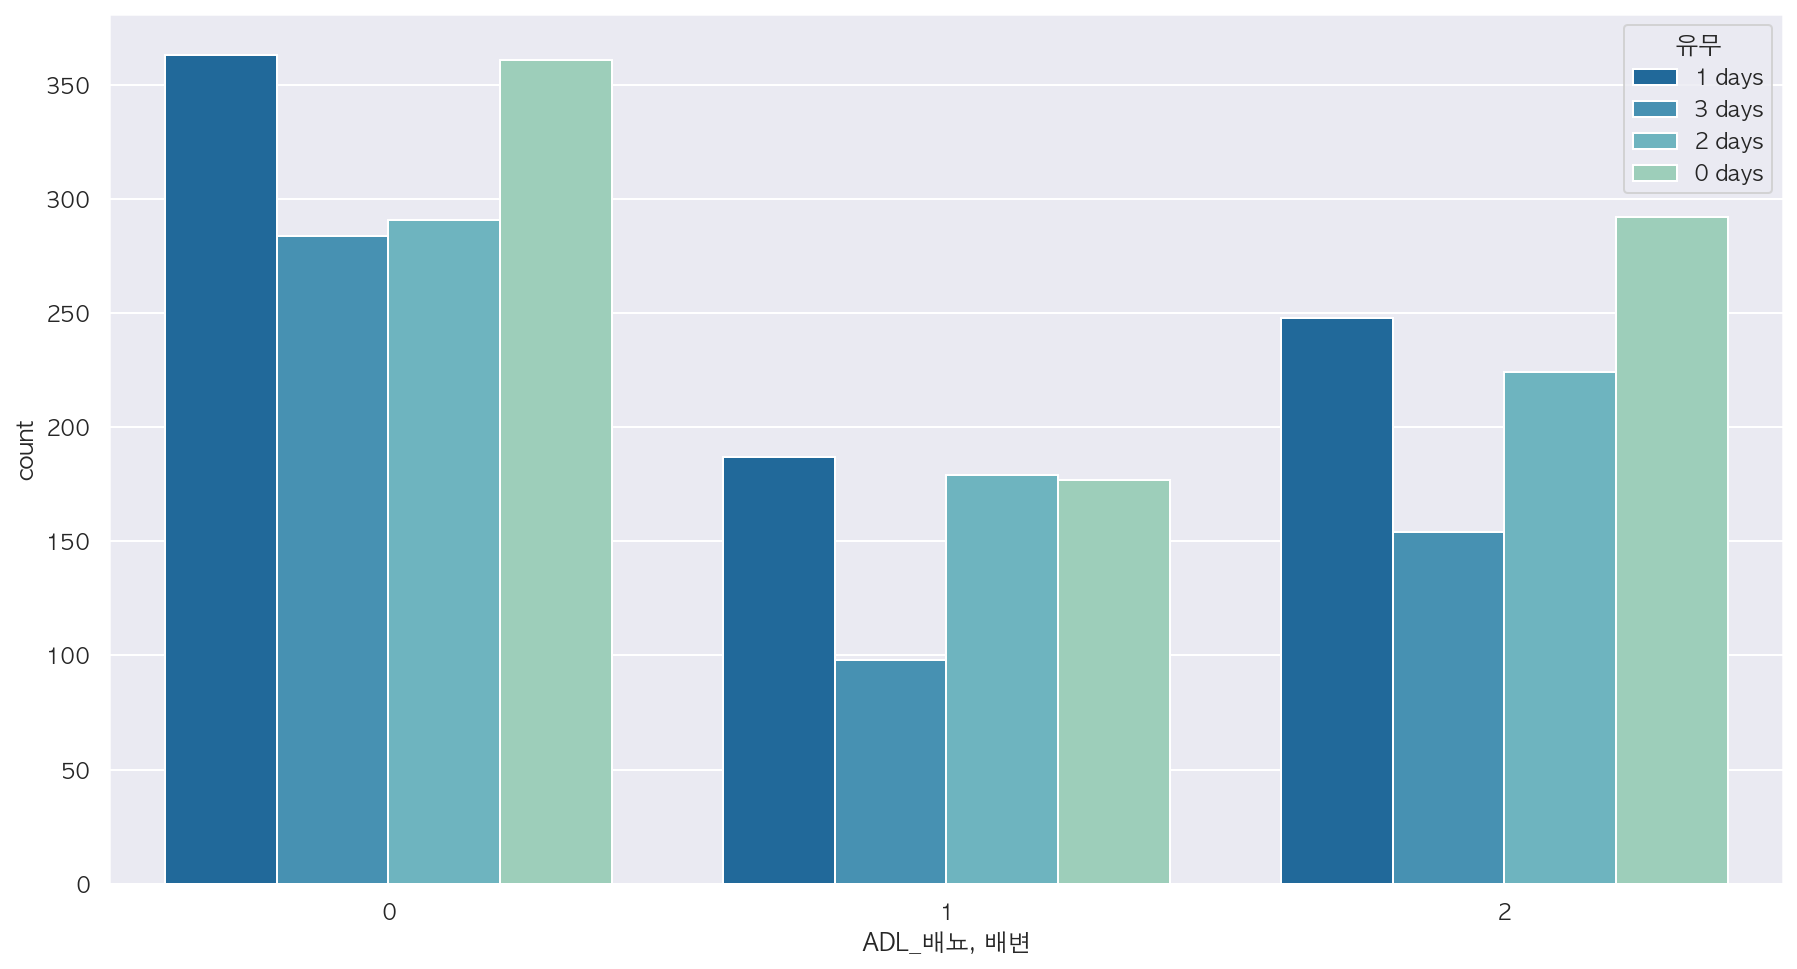

In [79]:
sns.countplot(x=fall['ADL_배뇨, 배변'], hue=fall['유무'])

/Users/yena/miniforge3/envs/python_study_3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ADL_체위변경', ylabel='count'>

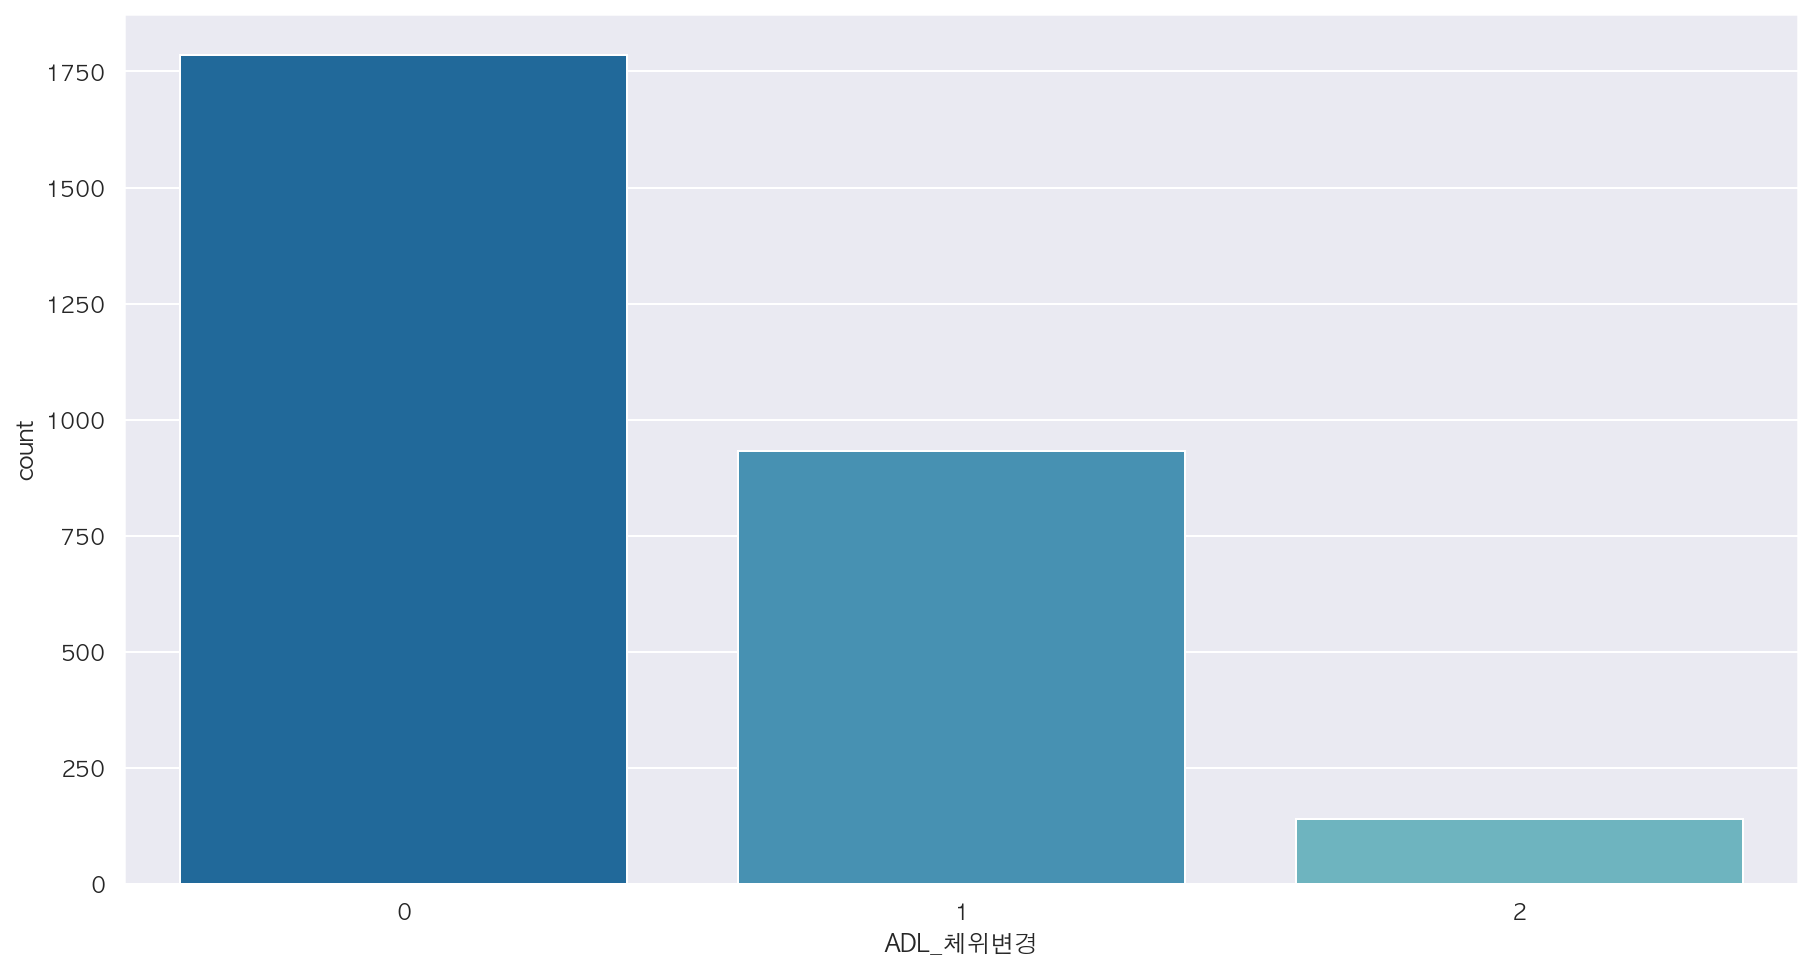

In [80]:
sns.countplot(fall['ADL_체위변경'])

In [104]:
fall['ADL_체위변경'].value_counts()

0    1785
1     933
2     140
Name: ADL_체위변경, dtype: int64

In [107]:
140/(1785+933+140)

0.0489853044086774

<AxesSubplot:xlabel='ADL_체위변경', ylabel='count'>

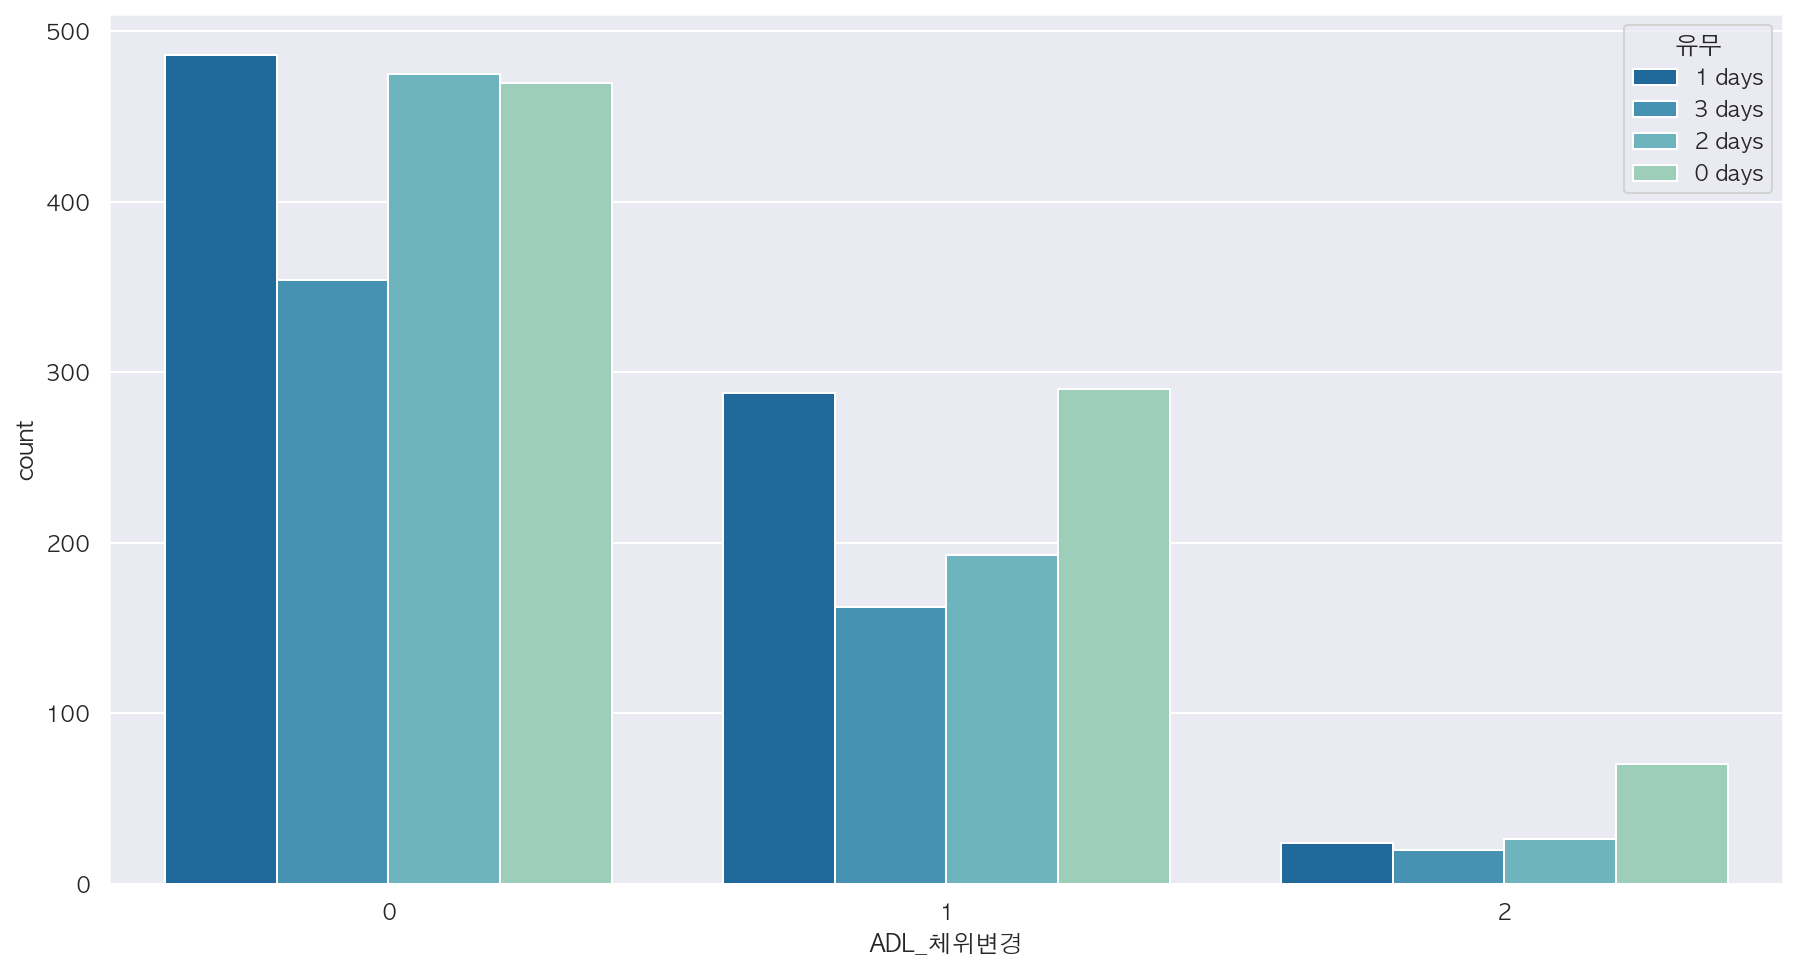

In [81]:
sns.countplot(x=fall['ADL_체위변경'], hue=fall['유무'])

<AxesSubplot:xlabel='ADL_침상 밖으로 이동', ylabel='count'>

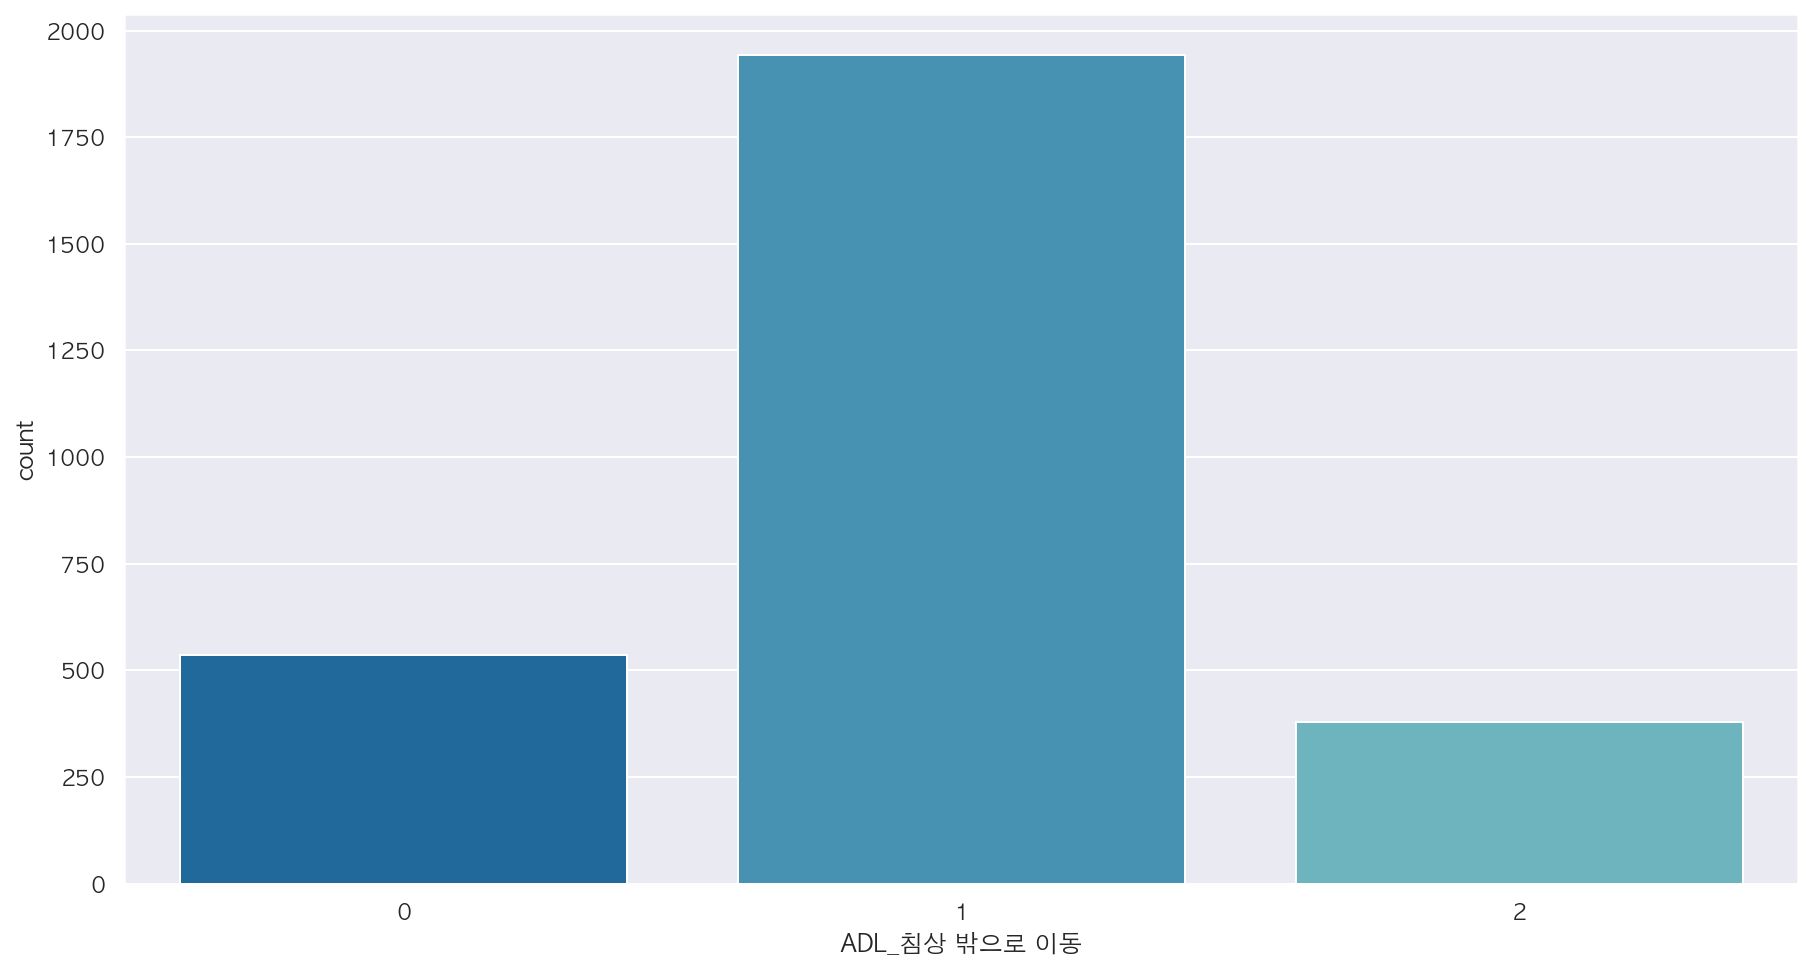

In [82]:

sns.countplot(x=fall['ADL_침상 밖으로 이동'])

In [108]:
fall['ADL_침상 밖으로 이동'].value_counts()

1    1942
0     536
2     380
Name: ADL_침상 밖으로 이동, dtype: int64

In [116]:
380/(1942+536+380)

0.13296011196641008

<AxesSubplot:xlabel='ADL_침상 밖으로 이동', ylabel='count'>

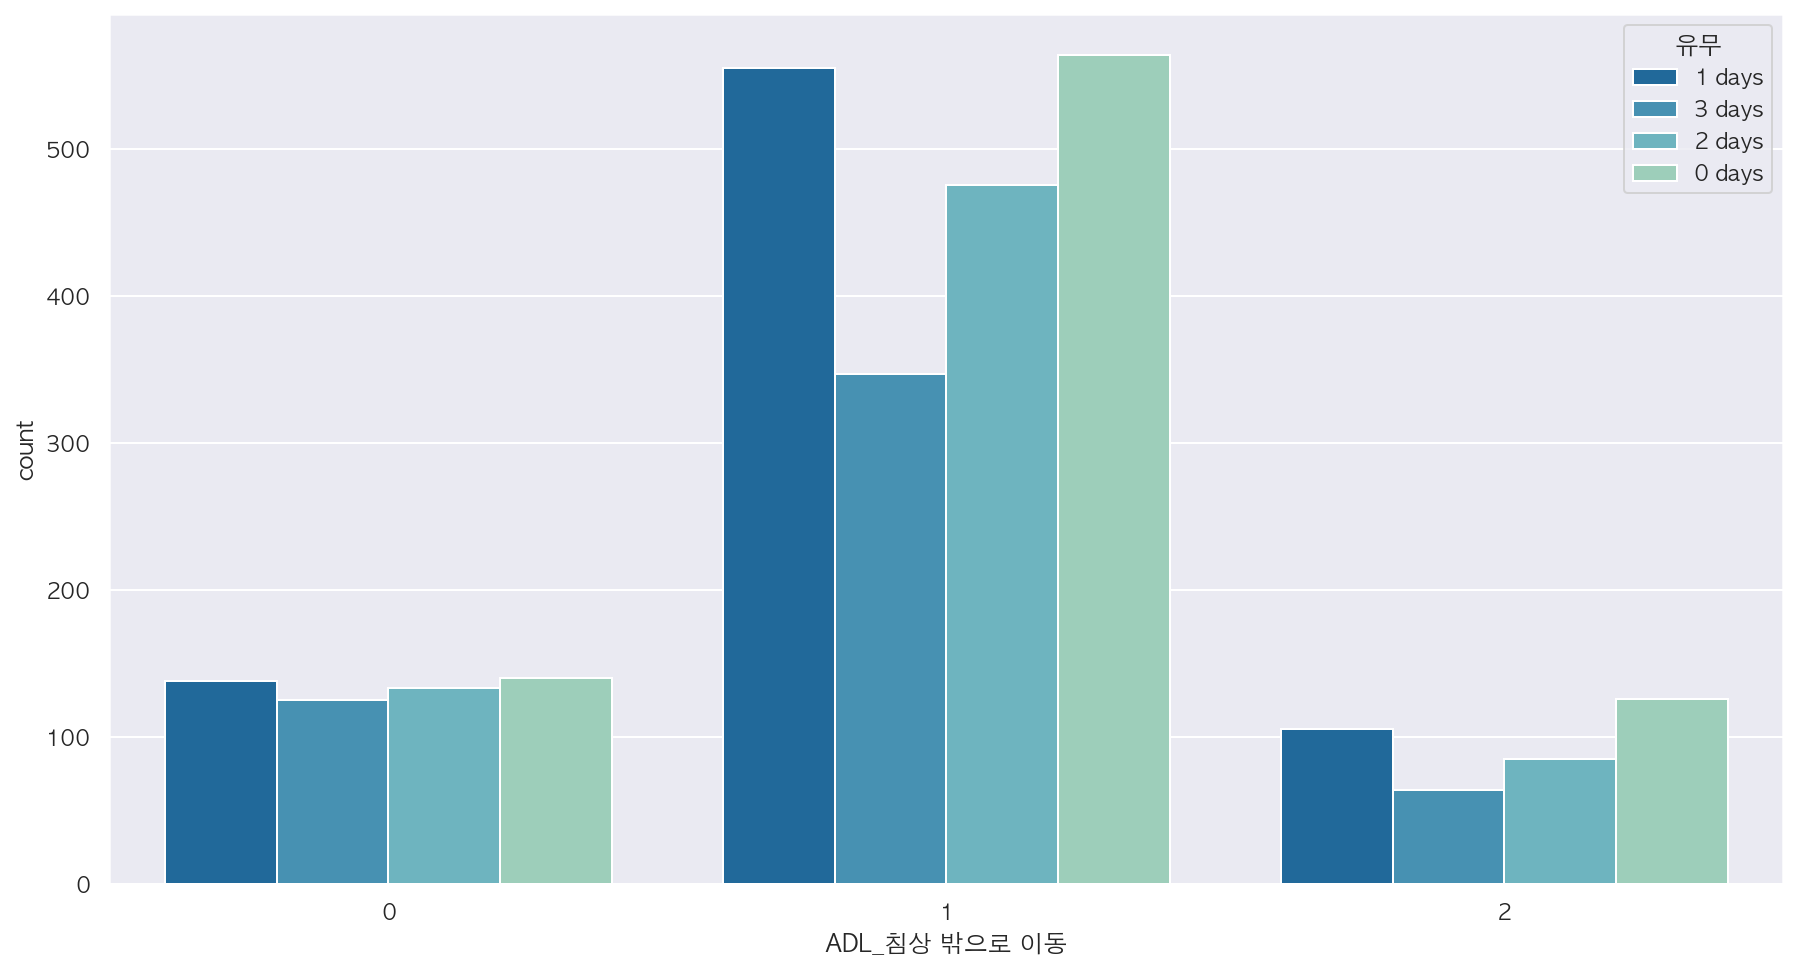

In [83]:
sns.countplot(x=fall['ADL_침상 밖으로 이동'], hue=fall['유무'])

<AxesSubplot:xlabel='ADL_식사섭취', ylabel='count'>

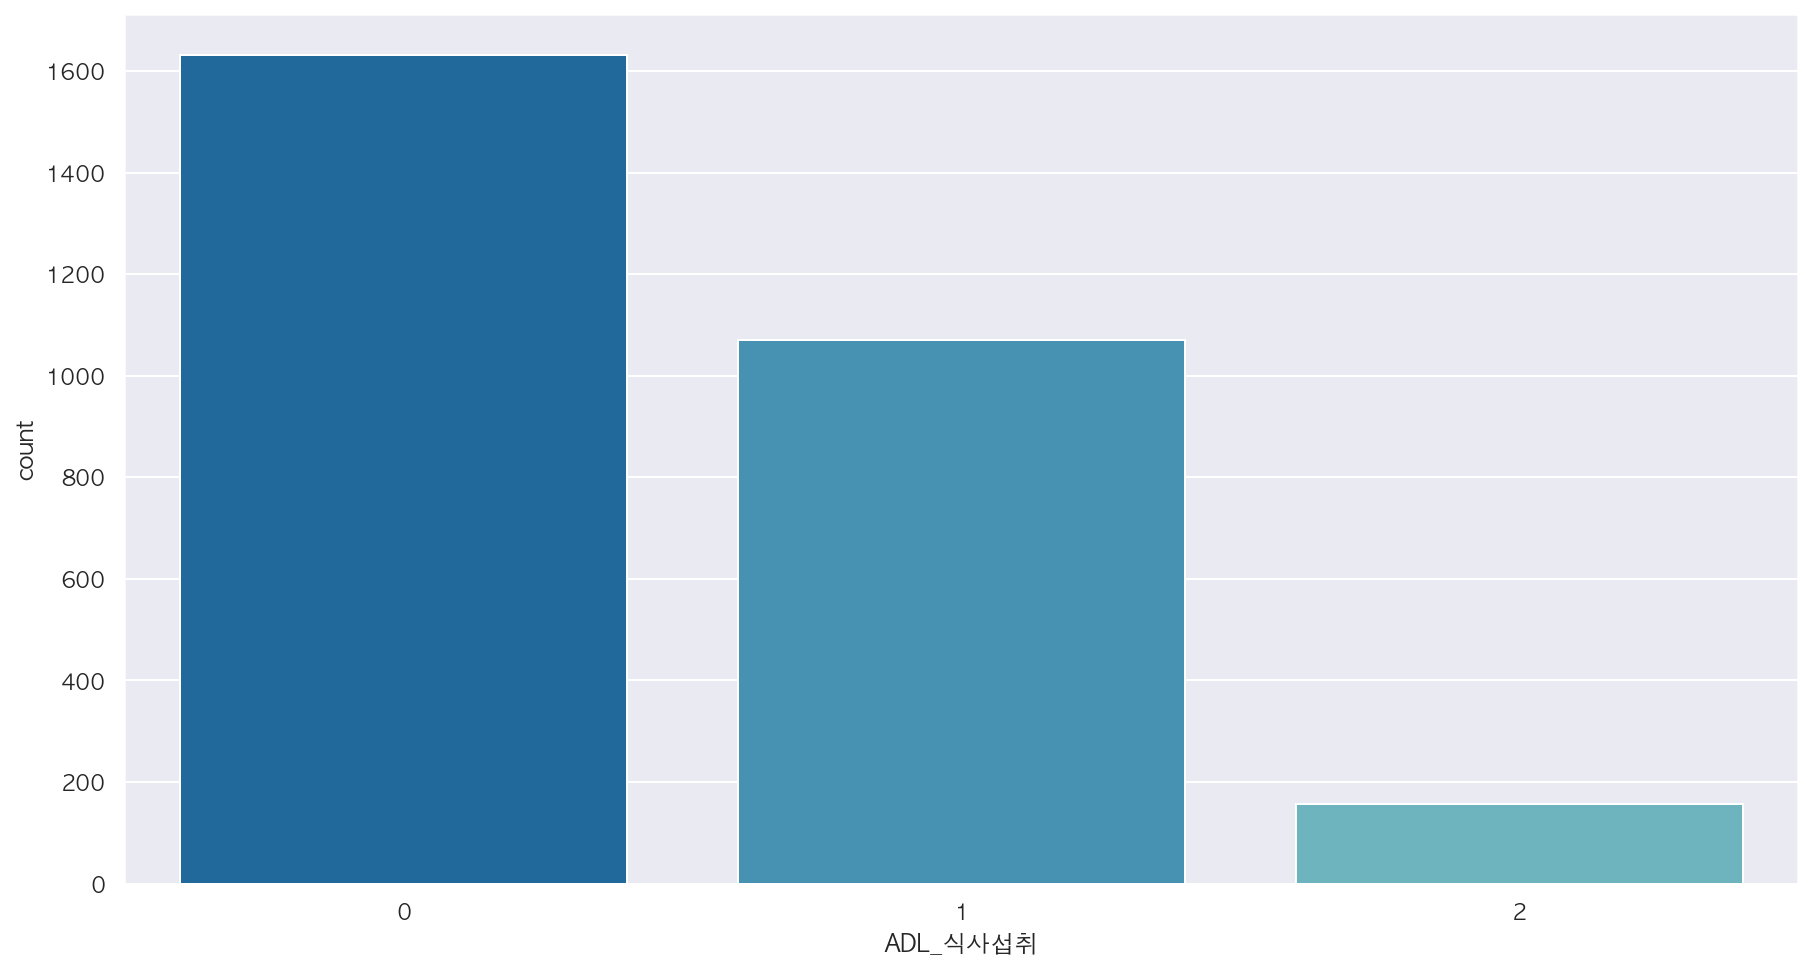

In [84]:

sns.countplot(x=fall['ADL_식사섭취'])

In [117]:
fall['ADL_식사섭취'].value_counts()

0    1631
1    1071
2     156
Name: ADL_식사섭취, dtype: int64

In [121]:
156/(1631+1071+156)

0.05458362491252624

<AxesSubplot:xlabel='ADL_식사섭취', ylabel='count'>

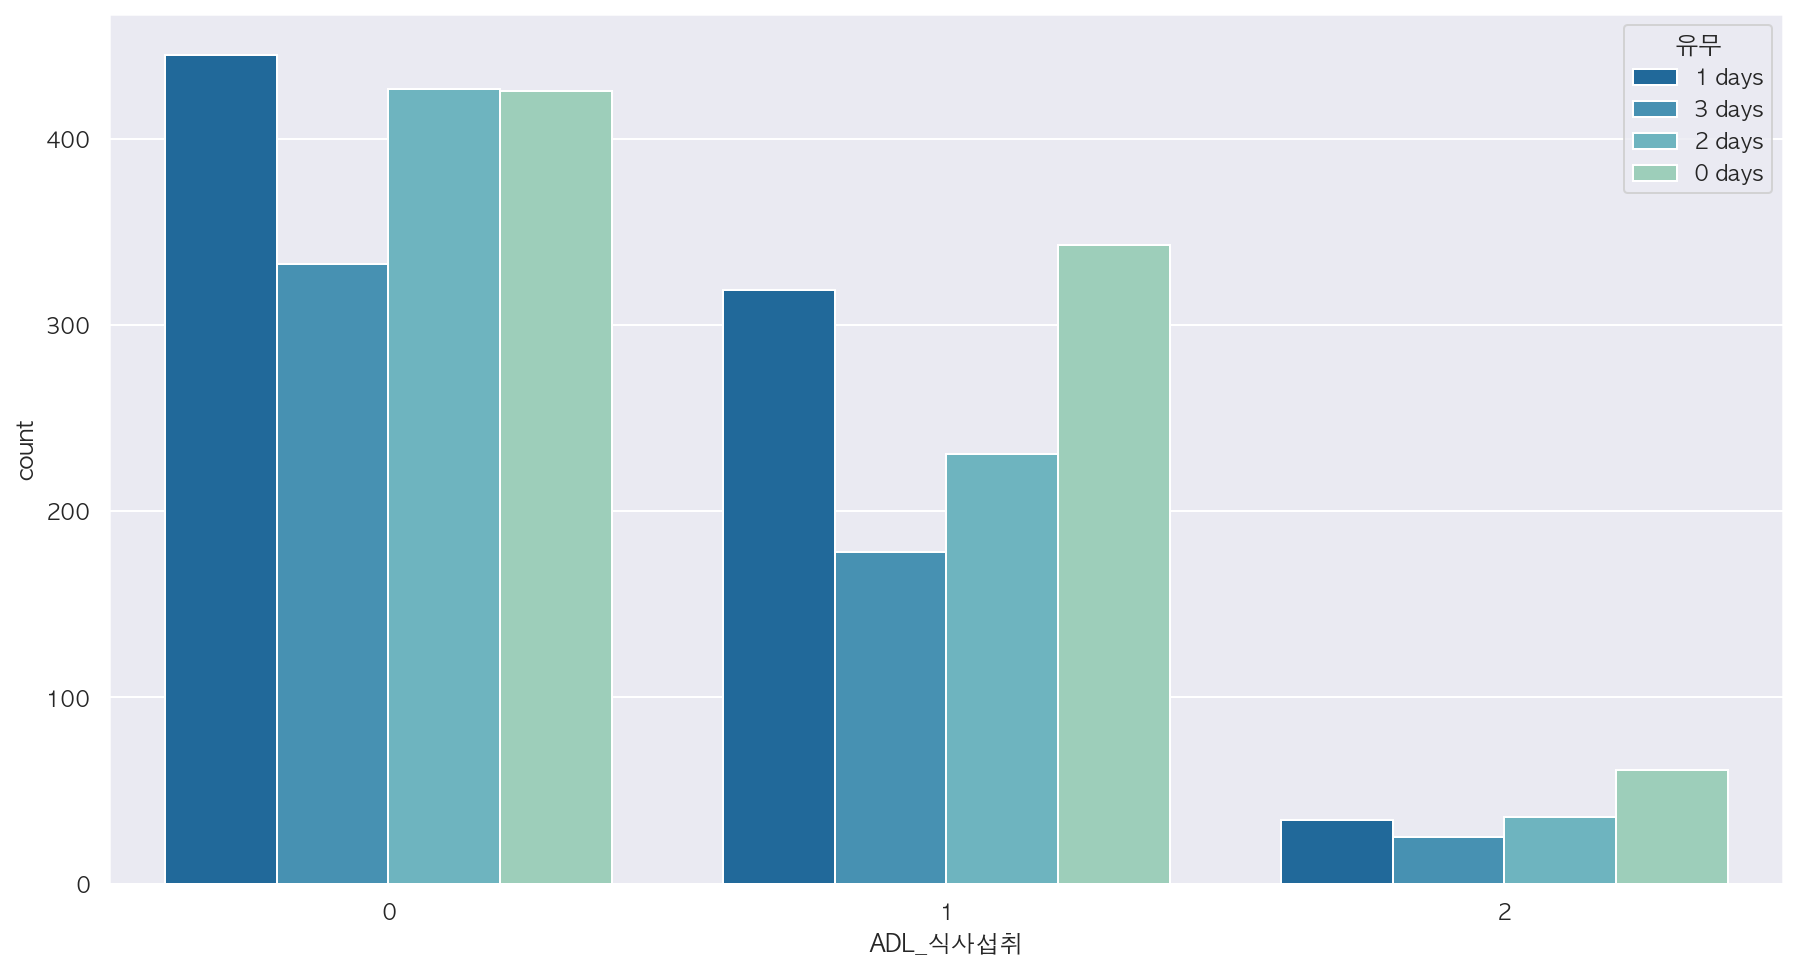

In [85]:
sns.countplot(x=fall['ADL_식사섭취'], hue=fall['유무'])

<AxesSubplot:xlabel='호흡 간호_비침습적 산소 투여', ylabel='count'>

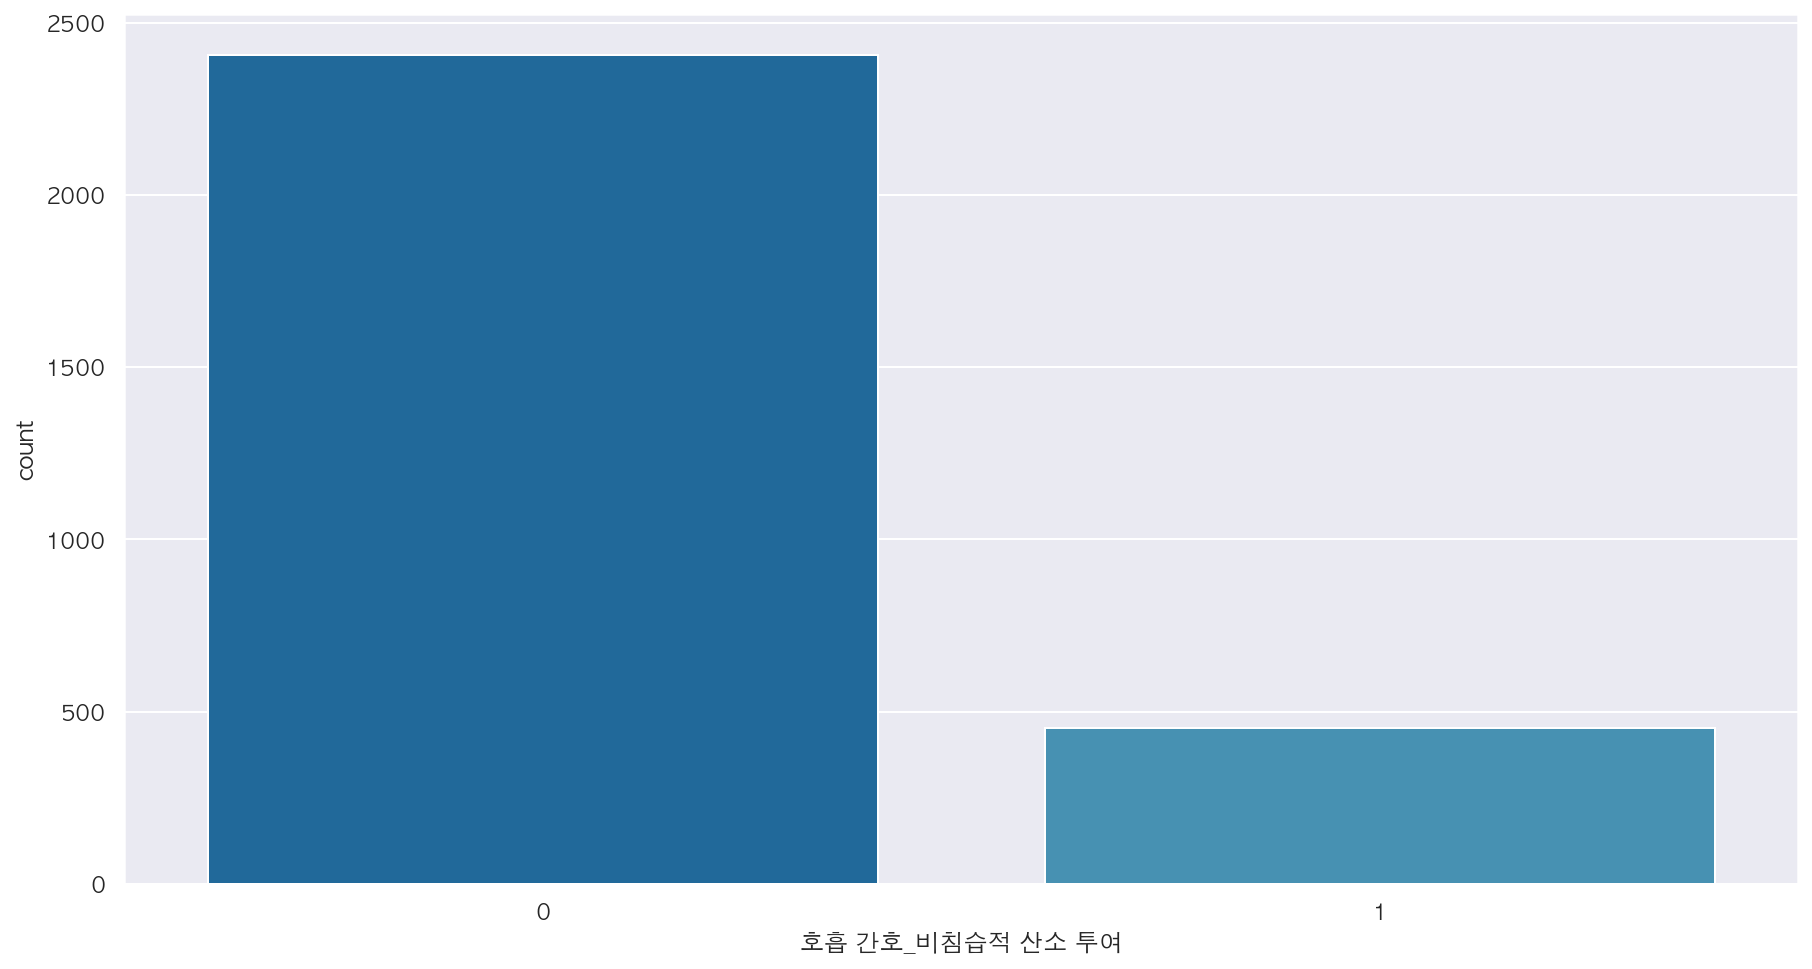

In [86]:
sns.countplot(x=fall['호흡 간호_비침습적 산소 투여'])

In [122]:
fall['호흡 간호_비침습적 산소 투여'].value_counts()

0    2407
1     451
Name: 호흡 간호_비침습적 산소 투여, dtype: int64

In [124]:
451/(2407+451)

0.15780265920223932

<AxesSubplot:xlabel='호흡 간호_비침습적 산소 투여', ylabel='count'>

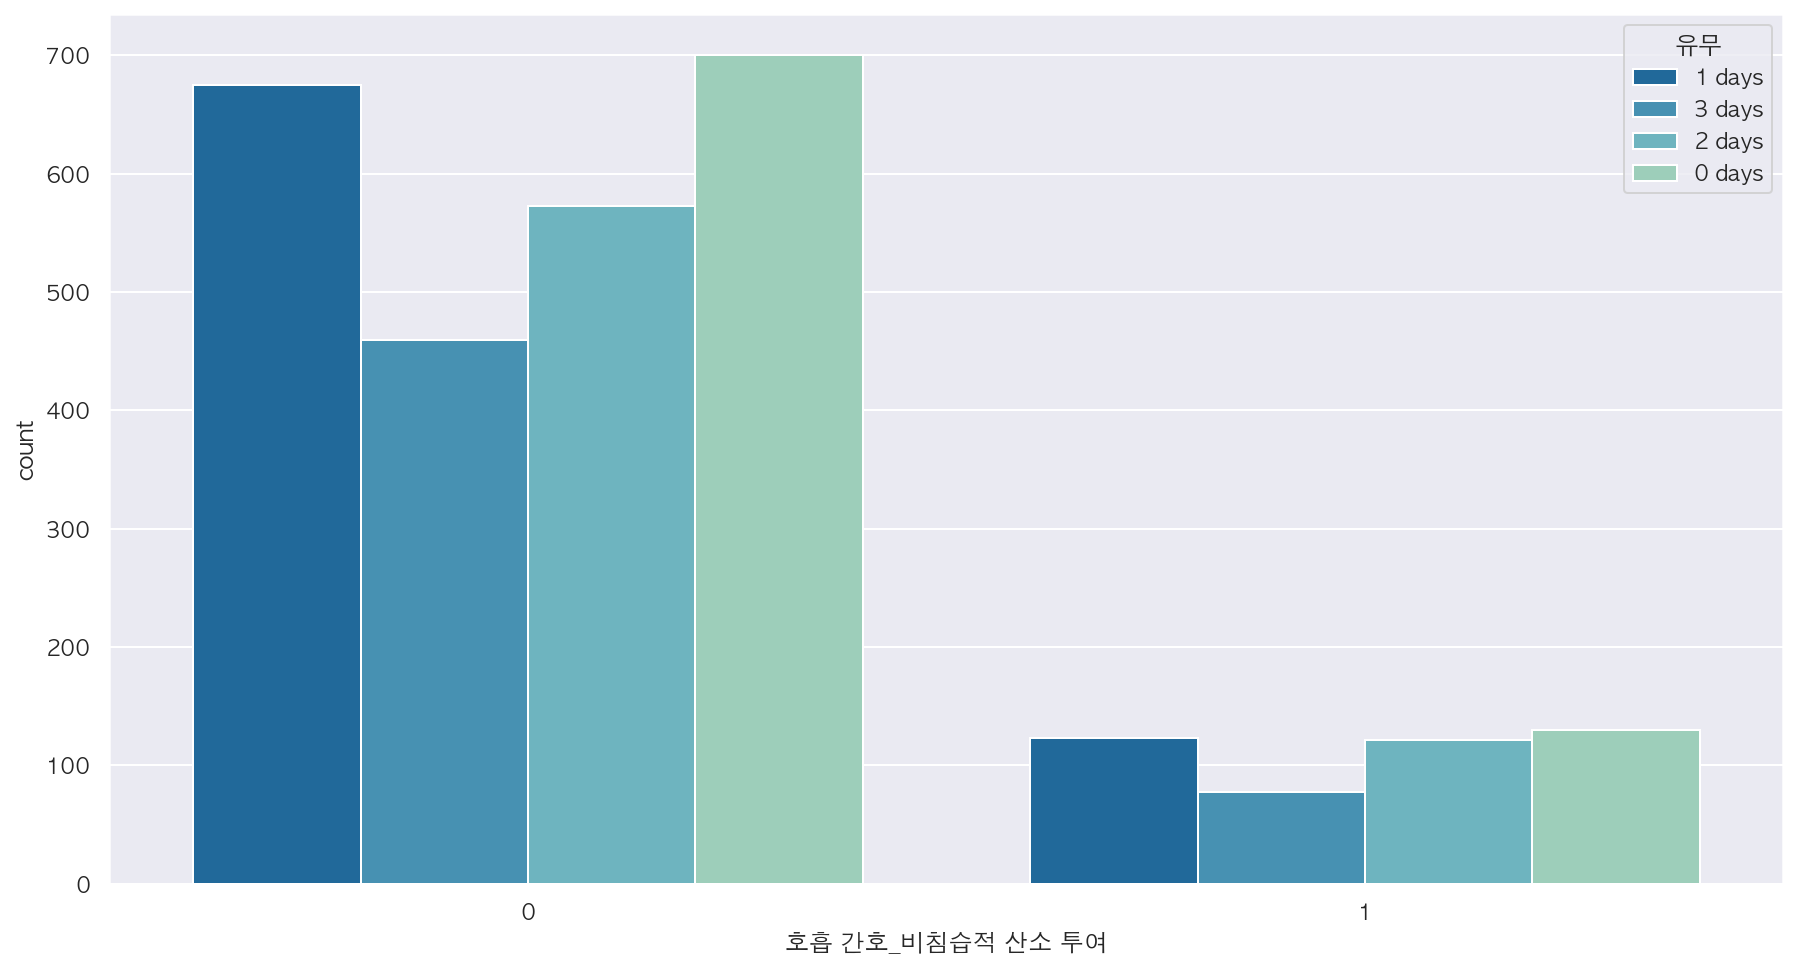

In [87]:
sns.countplot(x=fall['호흡 간호_비침습적 산소 투여'], hue=fall['유무'])

## **통증 강도**

In [88]:
pain = fall[['등록번호', '통증강도']]
pain = pain.drop_duplicates()
pain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298 entries, 0 to 2854
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   등록번호    298 non-null    int64  
 1   통증강도    298 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 7.0 KB


/Users/yena/miniforge3/envs/python_study_3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='통증강도'>

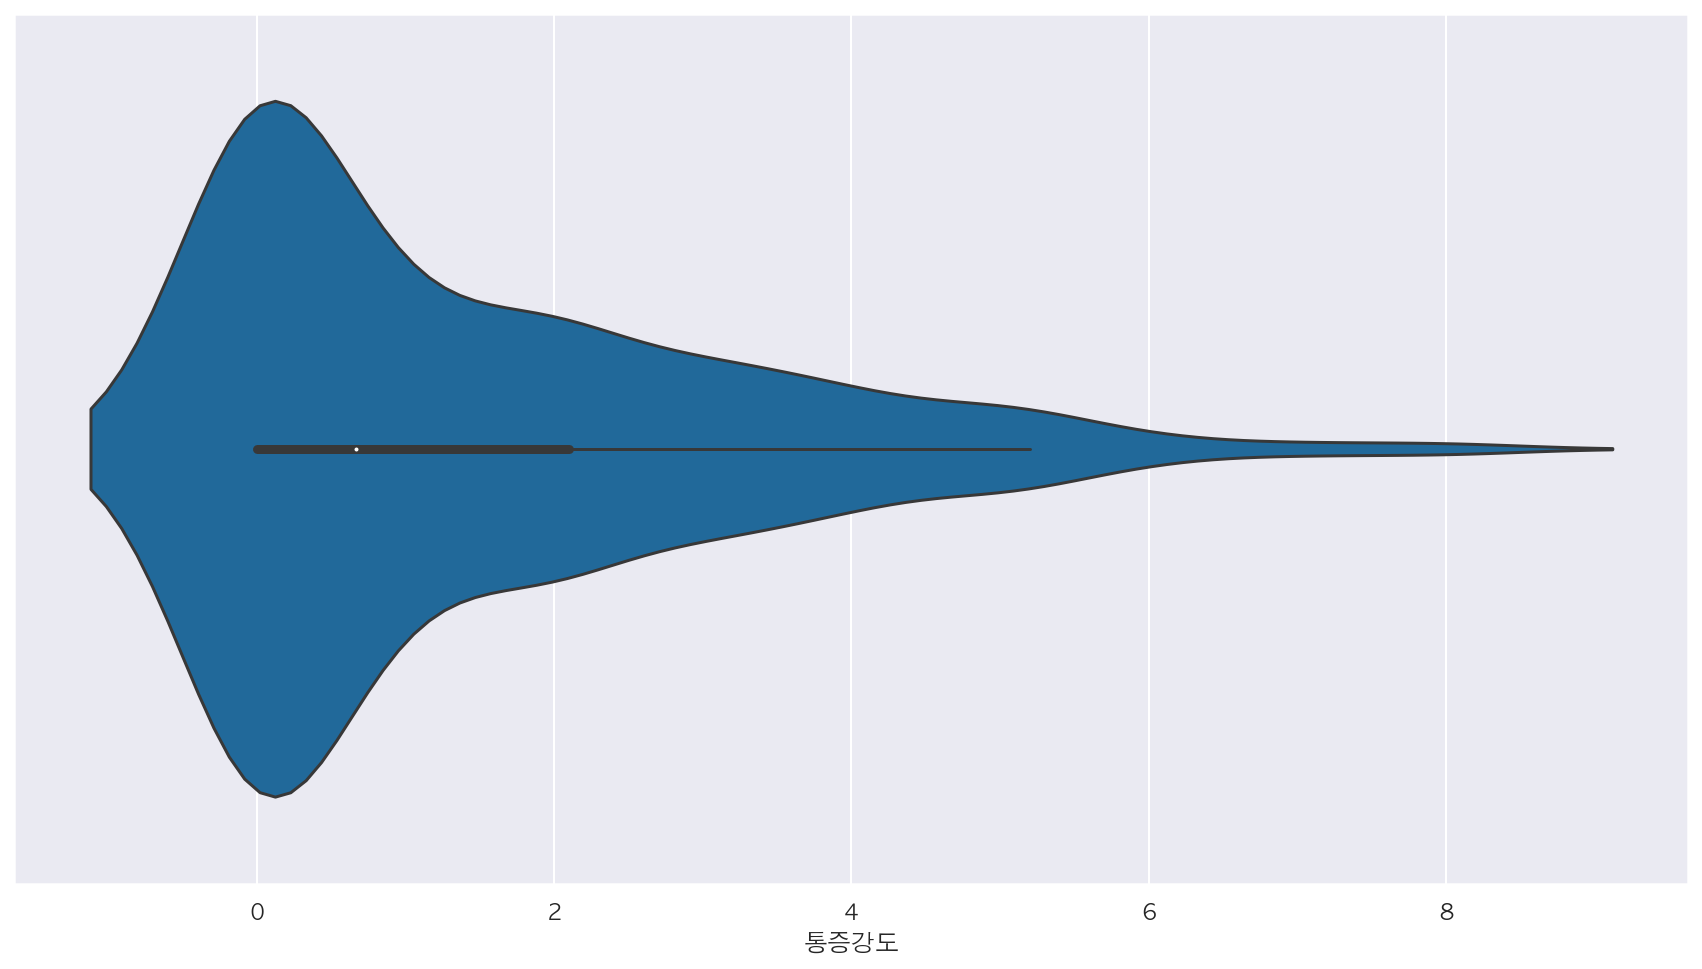

In [89]:
sns.violinplot(pain['통증강도'])

In [90]:
pain['통증강도'].describe()

count    298.000000
mean       1.411177
std        1.751570
min        0.000000
25%        0.000000
50%        0.668333
75%        2.100309
max        8.000000
Name: 통증강도, dtype: float64

## **욕창**

/Users/yena/miniforge3/envs/python_study_3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='욕창_행동', ylabel='count'>

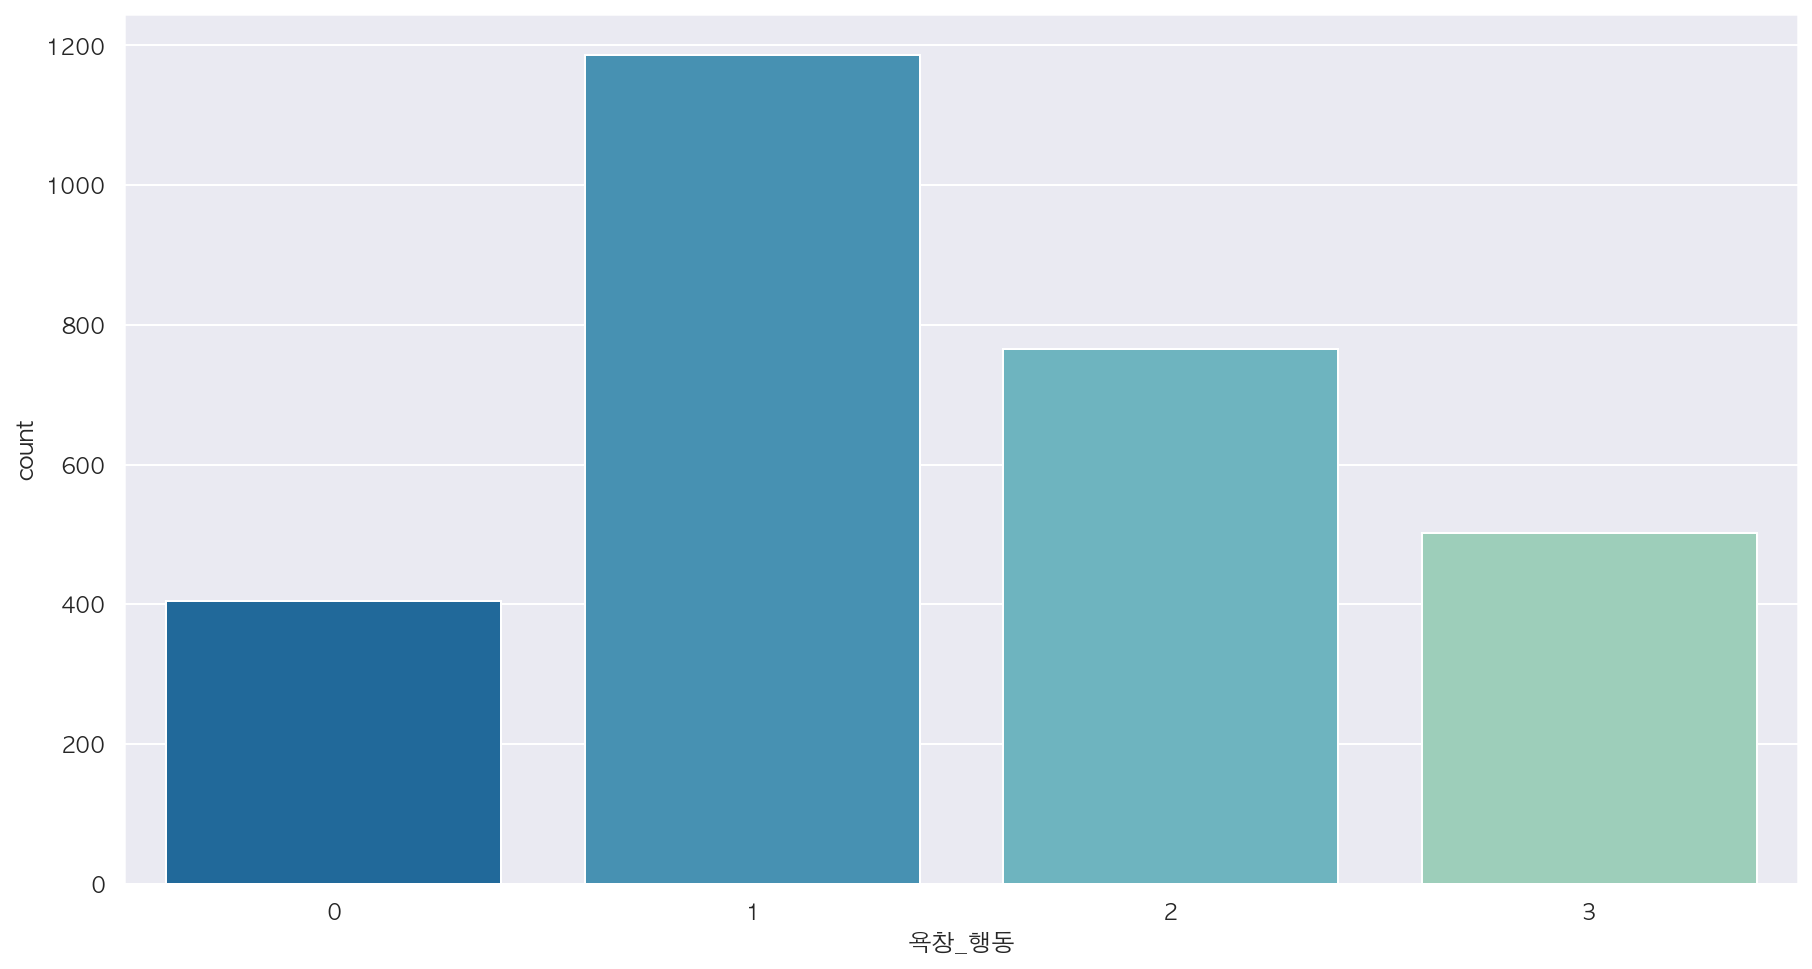

In [91]:
# fall[['등록번호', '욕창_행동', '욕창_영양']]
sns.countplot(fall['욕창_행동'])

In [92]:
fall['욕창_행동'].value_counts()

1    1186
2     766
3     502
0     404
Name: 욕창_행동, dtype: int64

In [128]:
502/(404+1186+766+502)

0.17564730580825752

/Users/yena/miniforge3/envs/python_study_3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='욕창_영양', ylabel='count'>

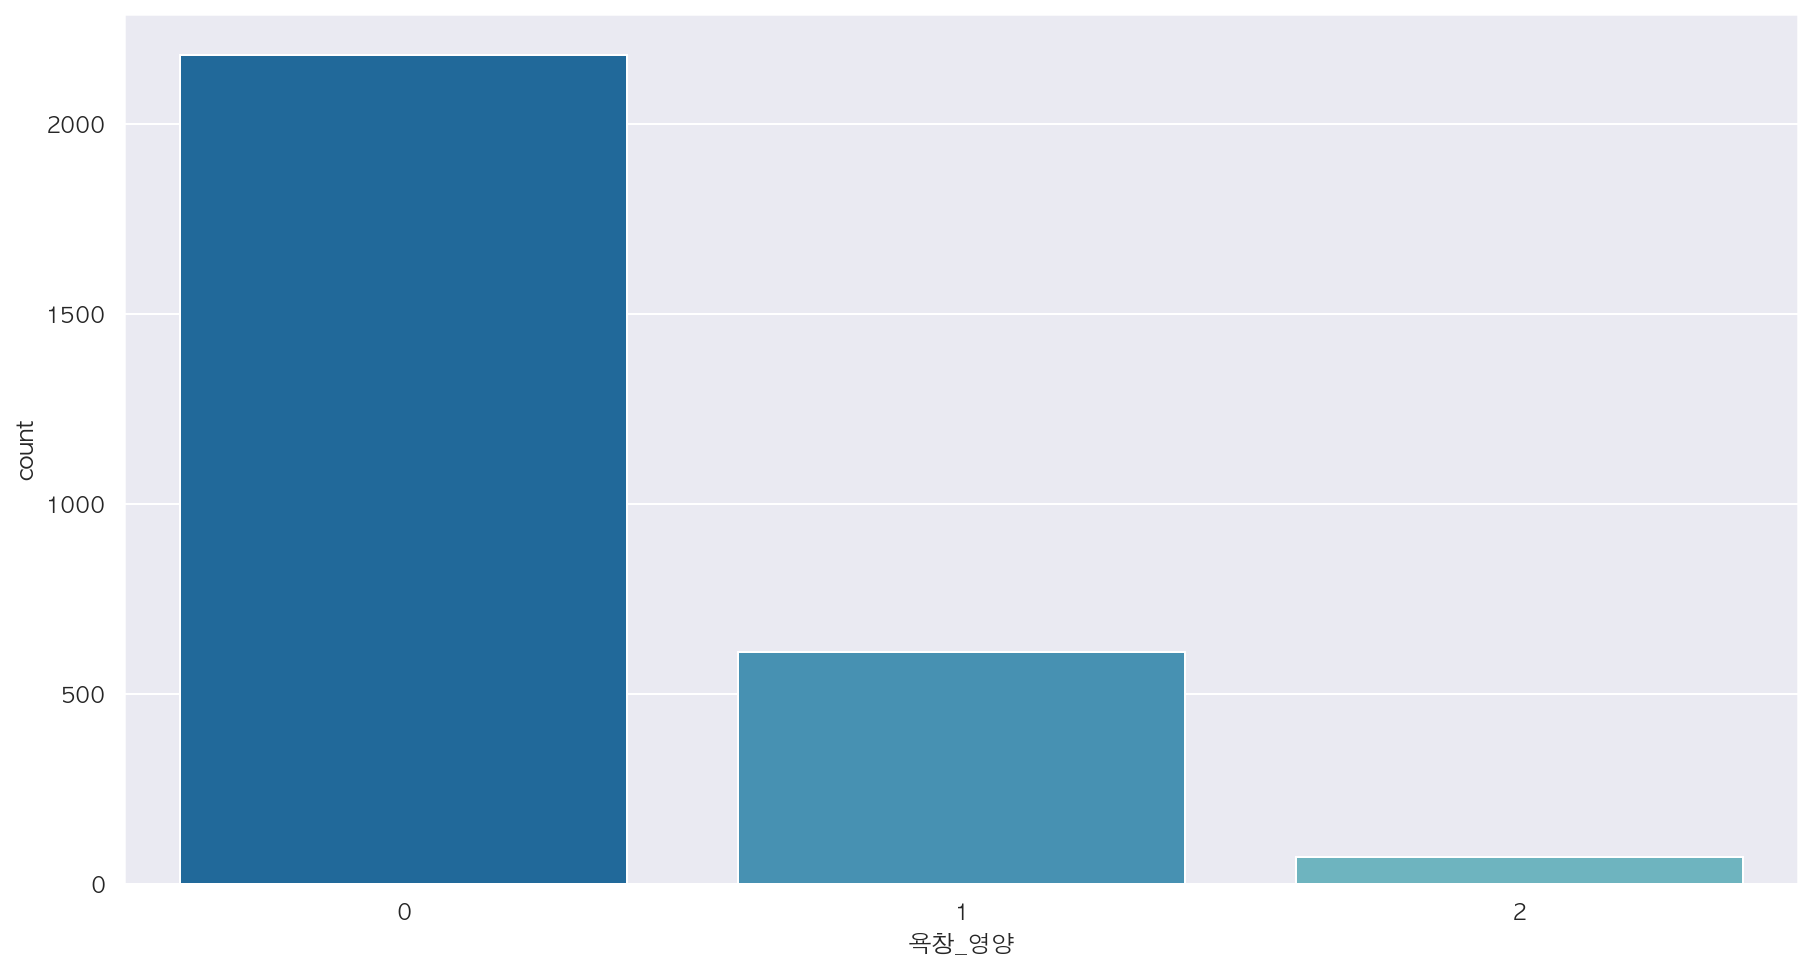

In [93]:
sns.countplot(fall['욕창_영양'])

In [94]:
fall['욕창_영양'].value_counts()

0    2180
1     609
2      69
Name: 욕창_영양, dtype: int64

In [131]:
69/(2180+609+69)


0.024142757172848146

## **병원**

In [95]:
hos = fall[['등록번호','병원']]
hos = hos.drop_duplicates()
hos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298 entries, 0 to 2854
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   등록번호    298 non-null    int64 
 1   병원      298 non-null    object
dtypes: int64(1), object(1)
memory usage: 7.0+ KB


/Users/yena/miniforge3/envs/python_study_3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='병원', ylabel='count'>

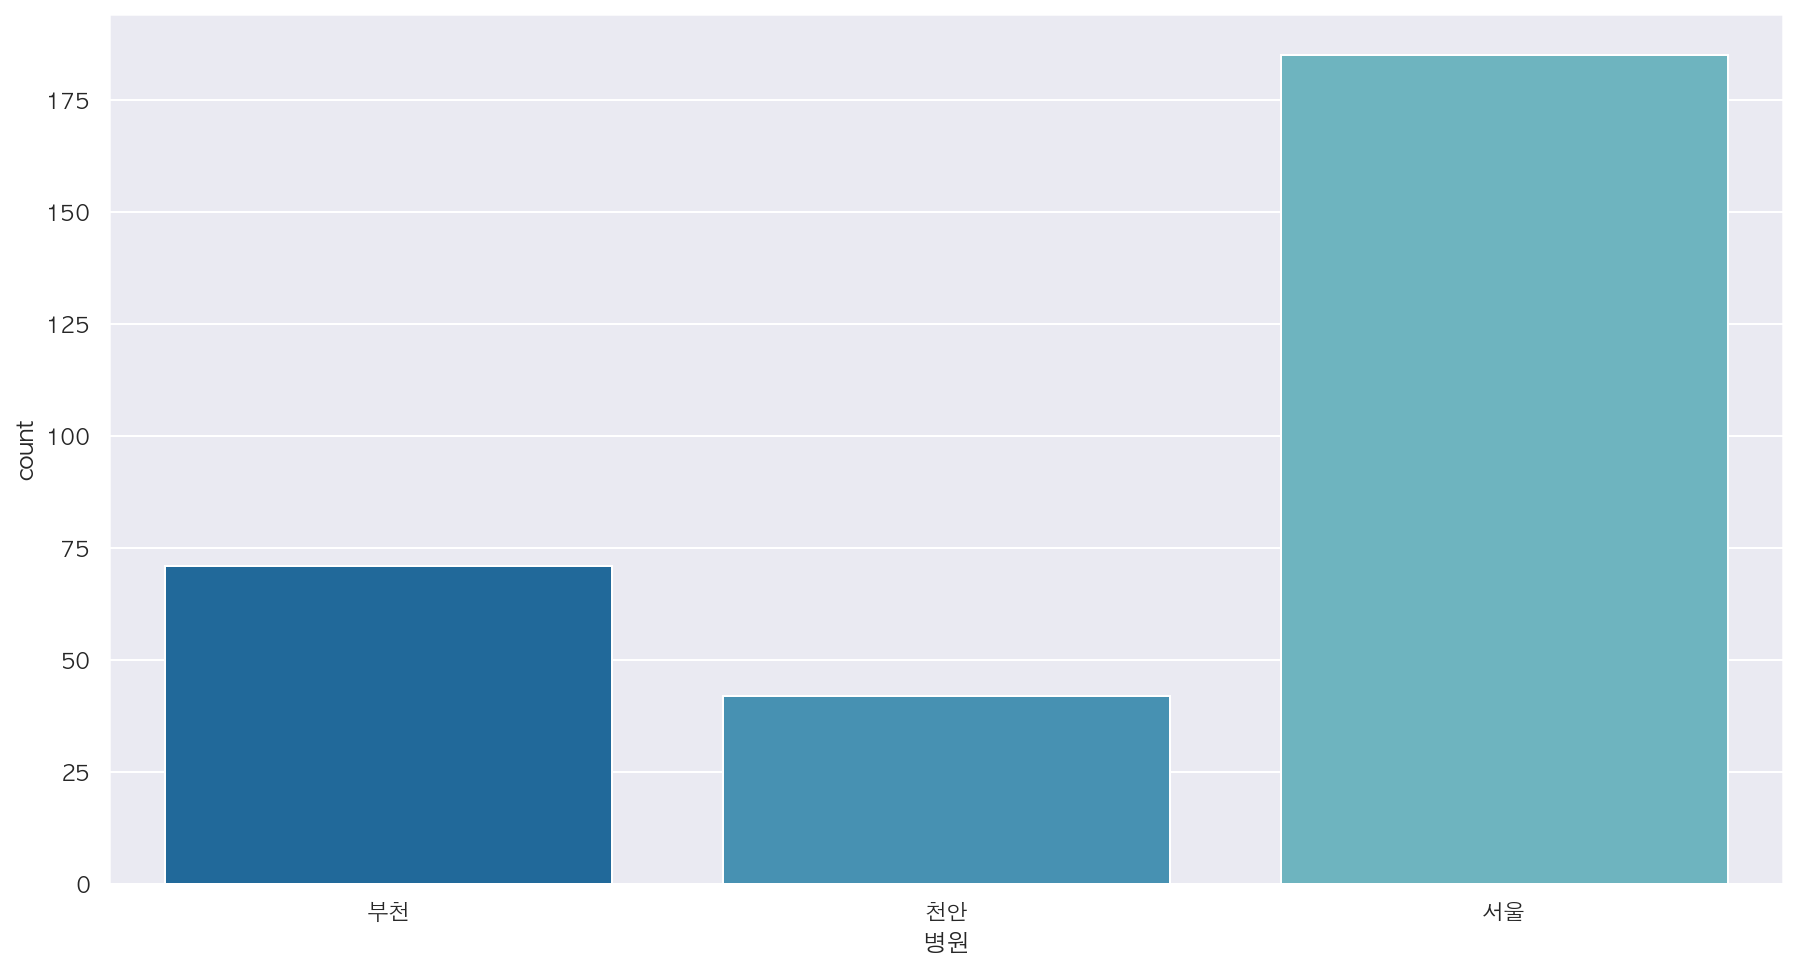

In [96]:
sns.countplot(hos['병원'])

In [97]:
hos['병원'].value_counts()

서울    185
부천     71
천안     42
Name: 병원, dtype: int64

## **cluster**

In [98]:
fall_cluster = fall_df[['등록번호','유무', 'Cluster', 'Cluster_c']]

In [99]:
fall_cluster.head()

,등록번호,유무,Cluster,Cluster_c
0,1218594,1 days,B,2
1,1218594,1 days,D,1
2,1218594,1 days,E,1
3,1218594,1 days,I,1
4,1218594,1 days,S,1


In [100]:
atc_test = pd.DataFrame(fall_cluster.groupby(['등록번호','유무', 'Cluster'])['Cluster_c'].count()).reset_index().drop_duplicates()
atc_test

,등록번호,유무,Cluster,Cluster_c
0,59472,1 days,I,1
1,59472,1 days,S,1
2,60730,1 days,C,1
3,60730,1 days,G,1
4,60730,1 days,I,1
...,...,...,...,...
2718,3113082,3 days,B,1
2719,3113082,3 days,G,1
2720,3113082,3 days,I,1
2721,3113082,3 days,L,1


In [101]:
eda_drug = pd.DataFrame(atc_test.groupby(['유무', 'Cluster'])['Cluster_c'].sum()).reset_index().drop_duplicates()
eda_drug['Cluster_c'] = eda_drug['Cluster_c'].astype(int)
eda_drug

,유무,Cluster,Cluster_c
0,0 days,A,27
1,0 days,B,46
2,0 days,C,115
3,0 days,D,28
4,0 days,E,61
...,...,...,...
79,3 days,Q,2
80,3 days,R,26
81,3 days,S,41
82,3 days,T,24


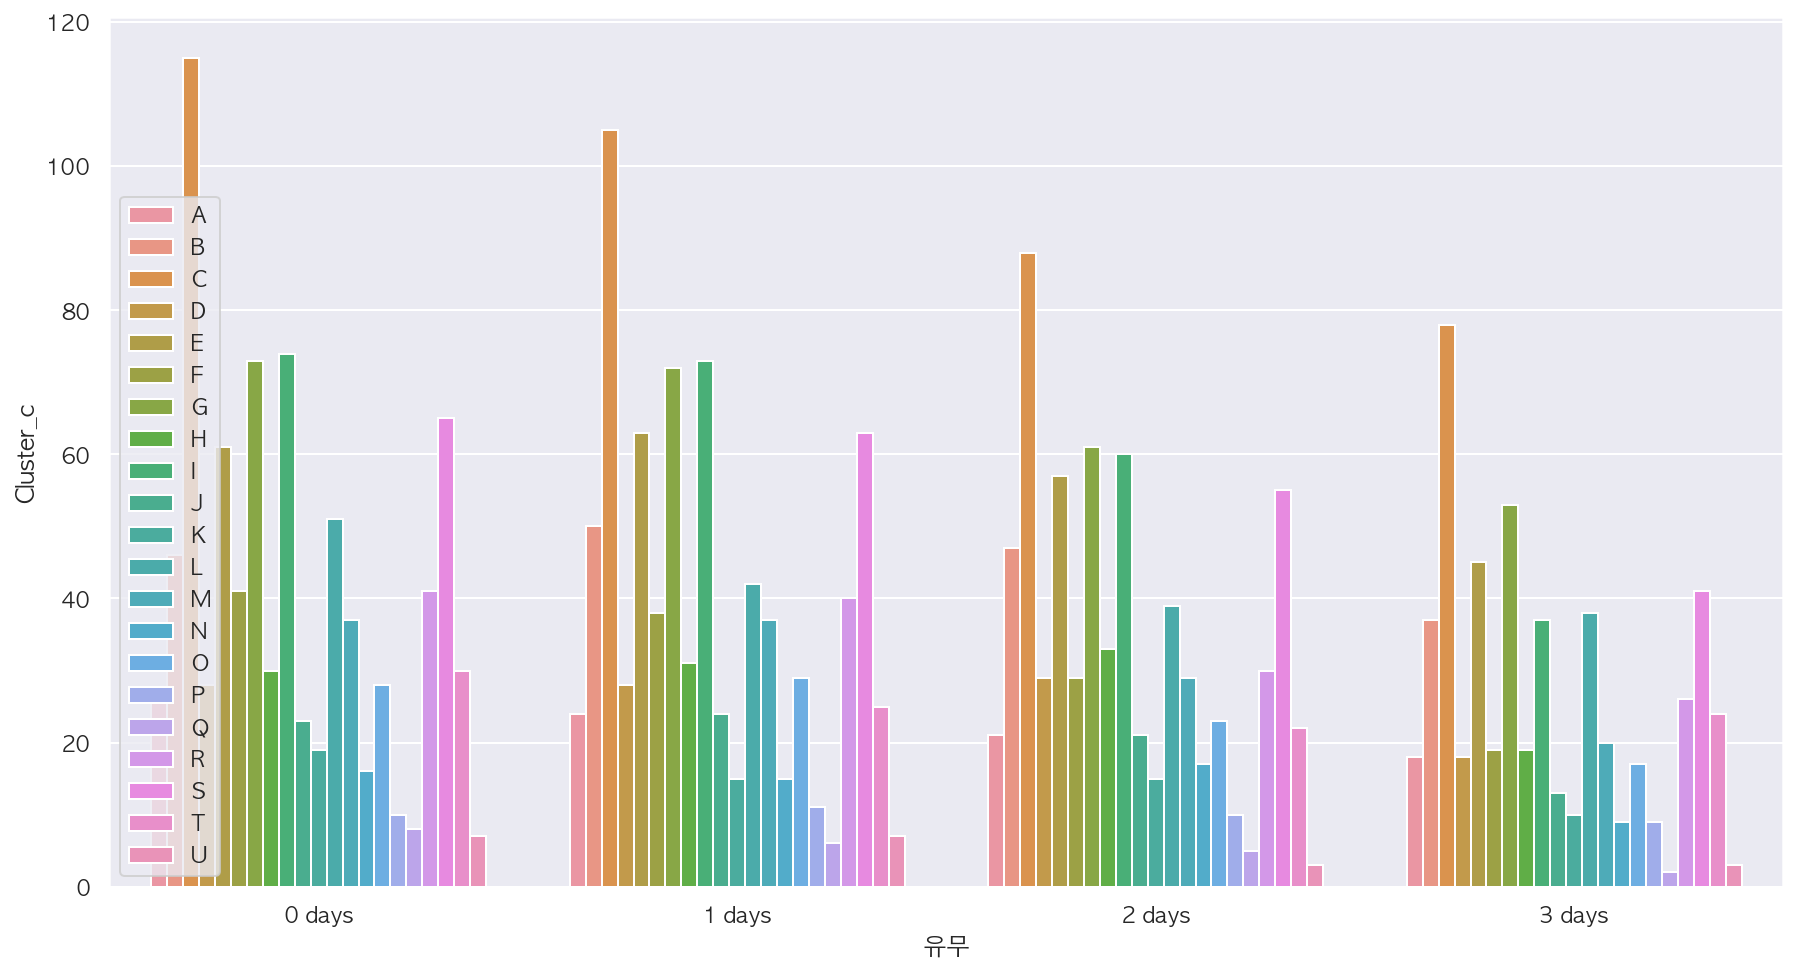

In [102]:

sns.barplot(x = eda_drug['유무'], y = eda_drug['Cluster_c'], hue = eda_drug['Cluster'])

plt.legend(loc='lower left')

In [ ]:
eda_drug=eda_drug.drop(columns='유무').drop_duplicates()

In [158]:
eda_drug['Cluster_c'].loc[(eda_drug['Cluster']=='A')].values

array([27, 24, 21, 18])

In [154]:
len(eda_drug['Cluster_c'].loc[(eda_drug['Cluster']=='A')].values)

4

In [144]:
clusts = eda_drug['Cluster'].unique()
clusts

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U'], dtype=object)

In [192]:
test = []
sort = []

for clust in clusts:
    count = eda_drug['Cluster_c'].loc[(eda_drug['Cluster']==clust)].values.sum()
    test.append(count)

   
test = np.array(test)

for i in range(0,21):
    a = ((test[i]/test.sum())*100).round(2)
    sort.append([clusts[i], a])
#   print('{} : {} % '.format(clusts[i], a))
          
sort.sort(key=lambda x:-x[1])
sort

[['C', 14.0],
 ['G', 9.39],
 ['I', 8.85],
 ['E', 8.19],
 ['S', 8.12],
 ['B', 6.53],
 ['L', 6.16],
 ['R', 4.97],
 ['F', 4.6],
 ['H', 4.1],
 ['T', 3.66],
 ['O', 3.52],
 ['A', 3.26],
 ['M', 3.12],
 ['J', 2.94],
 ['D', 2.72],
 ['N', 2.07],
 ['K', 1.6],
 ['P', 1.09],
 ['Q', 0.76],
 ['U', 0.36]]